In [ ]:
!pip install pymysql
!pip install mysql-connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the required libraries
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Connecting to the Server and Downloading the data

In [ ]:
#Making connection to database server
connection = mysql.connector.connect(host = '18.136.157.135',
                                     port = '3306',
                                     user = 'dm_team1',
                                     password = 'DM!$Team&279@20!')

In [ ]:
#Check the number of databases available on the server
cursor = connection.cursor()
cursor.execute('show databases')

In [ ]:
for i in cursor:
  print(i)

('information_schema',)
('project_banking',)


In [ ]:
#Connecting the database
connection = mysql.connector.connect(host = '18.136.157.135',
                                     port = '3306',
                                     user = 'dm_team1',
                                     password = 'DM!$Team&279@20!',
                                     database = 'project_banking')

In [ ]:
#Getting the list of tables oresent in the dataset
tables = pd.read_sql_query('show tables',connection)
print(tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


##Customer Enquiry Data:

This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

In [ ]:
data1 = pd.read_sql_query("select * from Cust_Enquiry",connection)
print(data1.shape)
data1

(413188, 6)


,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


### Customer Account Data:

This table contains customer’s historical accounts data and payments history

In [ ]:
data2 = pd.read_sql_query("select * from Cust_Account",connection)
print(data2.shape)
data2

(186329, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


### Customer Demographics Data:

Current customer applications with demographic data

Note that demographics features are renamed as features and obscured in accordance with privacy policies.

In [ ]:
data3 = pd.read_sql_query("select * from Cust_Demographics",connection)
print(data3.shape)
data3

(23896, 83)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,...,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,...,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,...,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,...,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,...,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,...,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,...,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card Setup,14,68000,...,13,R,,,0000-00-00,0,99111XXXXX,1,N,0
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740,3,Card Setup,14,158000,...,10,R,,,0000-00-00,0,93100XXXXX,1,N,0


In [ ]:
print("Shape of Cust_Enquiry      :",data1.shape)
print("Shape of Cust_Account      :",data2.shape)
print("Shape of Cust_Demographics :",data3.shape)

Shape of Cust_Enquiry      : (413188, 6)
Shape of Cust_Account      : (186329, 21)
Shape of Cust_Demographics : (23896, 83)


In [ ]:
# Save Files
data1.to_csv('Cust_Enquiry.csv',index=False)
data2.to_csv('Cust_Account.csv',index=False)
data3.to_csv('Cust_Demographics.csv',index=False)

### Data Extraction and trasformation

#### Extracting the data from Enquiry table

In [ ]:
#Getting the Cust equiry data
data1 = pd.read_csv("Cust_Enquiry.csv")

In [ ]:
#Getting the columns
data1.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose',
       'enq_amt'],
      dtype='object')

In [ ]:
#Locating specific columns
data1 = data1.loc[:,['customer_no','enq_amt']]
data1.head()

,customer_no,enq_amt
0,1,3500000.0
1,1,500000.0
2,1,50000.0
3,1,50000.0
4,1,1000.0


In [ ]:
Cust_group = data1.groupby(['customer_no'])

In [ ]:
data1_amt = pd.DataFrame(Cust_group.sum()).reset_index()
data1_amt.columns = ['customer_no', 'tatal_enq_amt']
print(data1_amt.head())
print(data1_amt.shape)

   customer_no  tatal_enq_amt
0            1   4.981150e+06
1            2   6.676682e+09
2            3   3.400000e+06
3            4   5.081000e+07
4            5   2.000000e+03
(23896, 2)


In [ ]:
data1_count = pd.DataFrame(Cust_group.count()).reset_index()
data1_count.columns = ['customer_no','tatal_enq_count']
data1_count.head()

,customer_no,tatal_enq_count
0,1,18
1,2,68
2,3,1
3,4,34
4,5,2


In [ ]:
data_enq = pd.merge(data1_amt,data1_count, on='customer_no', how='inner')
print(data_enq.head())
data_enq.shape

   customer_no  tatal_enq_amt  tatal_enq_count
0            1   4.981150e+06               18
1            2   6.676682e+09               68
2            3   3.400000e+06                1
3            4   5.081000e+07               34
4            5   2.000000e+03                2


(23896, 3)

### Extracting the data from Cust_Account

In [ ]:
#Heading the rows from cust account table
data2.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [ ]:
#getting columns
data2.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1',
       'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit',
       'cashlimit', 'rateofinterest', 'paymentfrequency',
       'actualpaymentamount'],
      dtype='object')

In [ ]:
Collist = ['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','creditlimit','cashlimit']
data_acc =data2.loc[:,Collist]
data_acc.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,,,
1,12265,16201,10390,,14000,1400
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,


In [ ]:
data_acc.fillna(0,inplace=True)
data_acc.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,,,
1,12265,16201,10390,,14000,1400
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,


In [ ]:
Cust_group_acc = data_acc.groupby(['customer_no'])
Cust_group_acc.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,,,
1,12265,16201,10390,,14000,1400
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,
...,...,...,...,...,...,...
186317,1611,97741,0,,,
186318,1611,300000,287017,,,
186319,1611,34001,0,,,
186320,1611,42320,0,,42490,


In [ ]:
data_acc = pd.DataFrame(Cust_group_acc.sum()).reset_index()
data_acc

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,250000420000,168000
1,10,1111113565675230005500000531458600000111851500...,068994000178725000000,,405000,243000
2,100,747754333541229800010000454945000034240350000,3970033460980316015530000,,300009800059000,980017700
3,1000,548289548289147688,31349029113,,225000270000,6750081000
4,10000,52590480000562501997410200520000,1752758222031250-26123003454770,,60000,10000
...,...,...,...,...,...,...
23891,9995,124964496733869524900038822,117236492223702016887613554,,4900038800,9800
23892,9996,44000977215000031516,4400033111263042843,,65000,13000
23893,9997,22990100000175409959090000,00095830,,,
23894,9998,407621558523169,386371389419983,,4100015000,4100


In [ ]:
data_acc.to_csv('Cust_Acount_Final.csv',index=True)

### Extracting data of Cust_Demographics table

In [ ]:
#Getting the datafrom Cust Demographics table
data_demo = pd.read_csv('Cust_Demographics.csv')
data_demo.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0


In [ ]:
#Getting the columns
data_demo.columns

Index(['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       '

In [ ]:
#Selecting the coumns for merging with other tables
demoCollist = ['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67',
       'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72',
       'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77',
       'feature_78', 'feature_79', 'Bad_label']

#### Merging the all tables

In [ ]:
#Getting the shapes of all the tables
print(data_enq.shape)
print(data_acc.shape)
print(data_demo.shape)

(23896, 3)
(23896, 6)
(23896, 83)


In [ ]:
#Merging the cust demographic table with cust enquiry table
data_merge = pd.merge(data_demo,data_enq,on='customer_no',how='left')
print(data_merge.shape)
data_merge.head()

(23896, 85)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,tatal_enq_amt,tatal_enq_count
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,4.981150e+06,18
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,6.676682e+09,68
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,...,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,3.400000e+06,1
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,...,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,5.081000e+07,34
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,...,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,2.000000e+03,2


In [ ]:
#Saving the merged file in csv
data_merge.to_csv('data_merge.csv')

In [ ]:
#Using concat to combine merged table and cust account table
data = pd.concat([data_merge, data_acc],axis=1)
print(data.shape)

(23896, 91)


## Basic Checks

In [ ]:
#Getting the file
data.to_csv('data.csv')
data.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_79,Bad_label,tatal_enq_amt,tatal_enq_count,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,N,0,4.981150e+06,18,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,250000420000,168000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,N,0,6.676682e+09,68,10,1111113565675230005500000531458600000111851500...,068994000178725000000,,405000,243000
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,...,N,0,3.400000e+06,1,100,747754333541229800010000454945000034240350000,3970033460980316015530000,,300009800059000,980017700
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,...,N,0,5.081000e+07,34,1000,548289548289147688,31349029113,,225000270000,6750081000
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,...,N,0,2.000000e+03,2,10000,52590480000562501997410200520000,1752758222031250-26123003454770,,60000,10000


In [ ]:
# View the last five rows of the dataset
data.tail()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_79,Bad_label,tatal_enq_amt,tatal_enq_count,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704.0,1.0,Card Setup,14.0,119000.0,...,N,0,1570344.0,16,9995,124964496733869524900038822,117236492223702016887613554,,4900038800,9800
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,NaN,NaN,2.0,Card Setup,14.0,35000.0,...,N,0,239010.0,12,9996,44000977215000031516,4400033111263042843,,65000,13000
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748.0,3.0,Card Setup,14.0,68000.0,...,N,0,102000.0,4,9997,22990100000175409959090000,00095830,,,
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740.0,3.0,Card Setup,14.0,158000.0,...,N,0,727000.0,8,9998,407621558523169,386371389419983,,4100015000,4100
23895,04-Dec-15,23896,06-Nov-15,Titanium Deligh,06-Nov-15,688.0,1.0,Card Setup,14.0,106000.0,...,N,0,11402001.0,16,9999,15275437582300022500441317500019718,089100991511500014749-27219-1,,250002500052000,10000


In [ ]:
# View datatypes of the features in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23896 entries, 0 to 23895
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dt_opened        23896 non-null  object 
 1   customer_no      23896 non-null  int64  
 2   entry_time       23881 non-null  object 
 3   feature_1        23881 non-null  object 
 4   feature_2        21060 non-null  object 
 5   feature_3        21060 non-null  float64
 6   feature_4        23881 non-null  float64
 7   feature_5        23881 non-null  object 
 8   feature_6        23881 non-null  float64
 9   feature_7        23881 non-null  float64
 10  feature_8        1261 non-null   object 
 11  feature_9        1261 non-null   object 
 12  feature_10       51 non-null     object 
 13  feature_11       23881 non-null  object 
 14  feature_12       23881 non-null  object 
 15  feature_13       10892 non-null  object 
 16  feature_14       16163 non-null  float64
 17  feature_15  

In [ ]:
#View the statistical information of the numerical columns (features)
data.describe()

,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,...,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,tatal_enq_amt,tatal_enq_count
count,23896.000000,21060.000000,23881.000000,23881.0,2.388100e+04,16163.000000,23881.000000,23881.000000,23881.000000,23881.000000,...,23881.000000,23881.000000,2.388100e+04,23881.000000,17.000000,23881.000000,23881.000000,23896.000000,2.389600e+04,23896.000000
mean,11948.500000,723.235945,2.321595,14.0,1.190705e+05,8.086618,1.049412,1.233910,0.725640,217620.229346,...,0.184373,1.238851,3.278933e+04,14.539048,2.411765,0.003852,1.043214,0.042015,1.432894e+07,17.286491
std,6898.325352,37.318684,0.892838,0.0,7.752349e+04,5.625654,0.216731,0.423324,1.124986,159267.102213,...,0.387796,0.430009,1.087860e+05,9.077906,0.618347,0.084286,0.224672,0.200628,1.118235e+08,15.253240
min,1.000000,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,...,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,5974.750000,698.000000,1.000000,14.0,7.200000e+04,0.000000,1.000000,1.000000,0.000000,110051.000000,...,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000,3.712492e+05,7.000000
50%,11948.500000,721.000000,3.000000,14.0,1.040000e+05,12.000000,1.000000,1.000000,0.000000,110094.000000,...,0.000000,1.000000,3.000000e+04,10.000000,2.000000,0.000000,1.000000,0.000000,1.281205e+06,13.000000
75%,17922.250000,745.000000,3.000000,14.0,1.390000e+05,12.000000,1.000000,1.000000,2.000000,390002.000000,...,0.000000,1.000000,4.300000e+04,17.000000,3.000000,0.000000,1.000000,0.000000,4.013355e+06,23.000000
max,23896.000000,896.000000,3.000000,14.0,1.217000e+06,12.000000,2.000000,2.000000,10.000000,712245.000000,...,1.000000,3.000000,1.500000e+07,35.000000,4.000000,4.000000,3.000000,1.000000,7.119712e+09,308.000000


In [ ]:
#We will drop the feature_6 as it has constant data in all rows
data.drop('feature_6',inplace=True, axis=1)
data.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,...,feature_79,Bad_label,tatal_enq_amt,tatal_enq_count,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,500000.0,NaN,...,N,0,4.981150e+06,18,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,250000420000,168000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,1200000.0,NaN,...,N,0,6.676682e+09,68,10,1111113565675230005500000531458600000111851500...,068994000178725000000,,405000,243000
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,700000.0,NaN,...,N,0,3.400000e+06,1,100,747754333541229800010000454945000034240350000,3970033460980316015530000,,300009800059000,980017700
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,500000.0,NaN,...,N,0,5.081000e+07,34,1000,548289548289147688,31349029113,,225000270000,6750081000
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,500000.0,NaN,...,N,0,2.000000e+03,2,10000,52590480000562501997410200520000,1752758222031250-26123003454770,,60000,10000


In [ ]:
data.replace(['?','*','$',' ','  ',''],np.nan,inplace=True)

### Data Preprocessing

In [ ]:
#Check for null values
data.isnull().sum()

dt_opened              0
customer_no            0
entry_time            15
feature_1             15
feature_2           2836
                   ...  
high_credit_amt       13
cur_balance_amt        0
amt_past_due       23110
creditlimit         4024
cashlimit           5461
Length: 90, dtype: int64

In [ ]:
data.loc[:,['feature_36','feature_37','feature_46','feature_48']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23896 entries, 0 to 23895
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_36  18214 non-null  object
 1   feature_37  18214 non-null  object
 2   feature_46  23802 non-null  object
 3   feature_48  5497 non-null   object
dtypes: object(4)
memory usage: 933.4+ KB


In [ ]:
#Getting rhe columns
data.columns

Index(['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53',
       'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58',
       'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63',
       

In [ ]:
#Imputing the missing values

data['high_credit_amt'] = data['high_credit_amt'].fillna(data['high_credit_amt'].mode()[0])
data['amt_past_due'] = data['amt_past_due'].fillna(data['amt_past_due'].mode()[0])
data['creditlimit'] = data['creditlimit'].fillna(data['creditlimit'].mode()[0])
data['cashlimit'] = data['cashlimit'].fillna(data['cashlimit'].mode()[0])

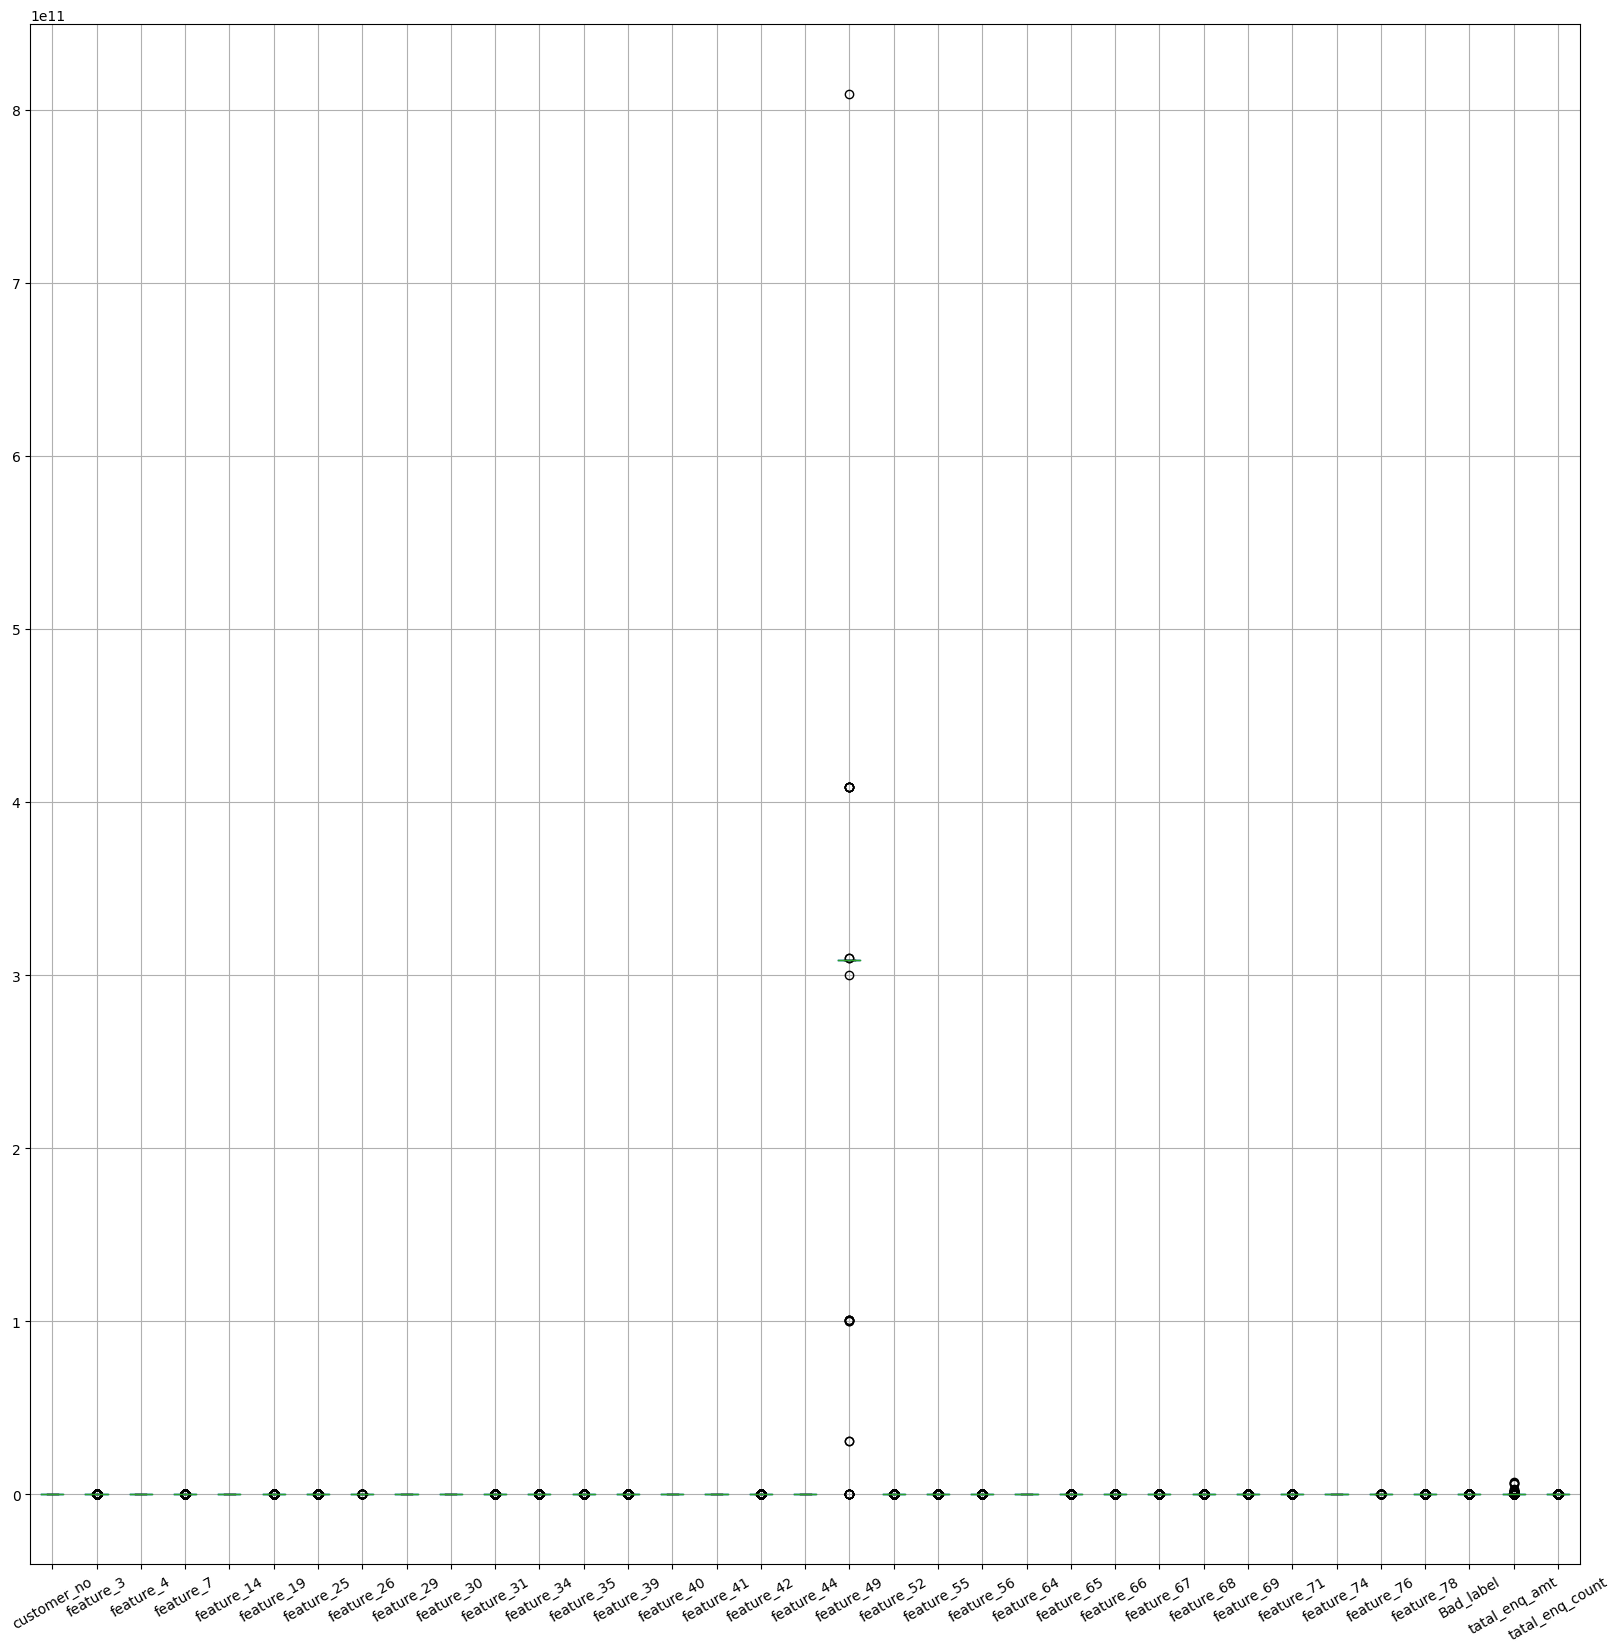

In [ ]:
#Checking for outliers
data.boxplot(figsize=(20,20),rot=30);

In [ ]:
data.loc[:,['feature_36','feature_37','feature_46','feature_48']]=data.loc[:,['feature_36','feature_37','feature_46','feature_48']].replace(np.nan,'others')

In [ ]:
from collections import Counter
Counter(data.feature_36)

Counter({'others': 5682,
         'Government Organisation': 642,
         'Public Ltd Co.': 5665,
         'Proprietorship': 1669,
         'Private Ltd. Co.': 8677,
         'MNC': 1511,
         'Partnership': 6,
         'PSU': 21,
         'Partnership Co.': 22,
         'Others': 1})

In [ ]:
#Dropping the duplicates values
data.drop_duplicates(inplace=True)
data.shape

(23896, 90)

In [ ]:
#Selelcting the columns
data_new = data.loc[:,['customer_no','feature_1','feature_4', 'feature_5',
        'feature_7','feature_11', 'feature_19',
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36',
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78',
       'feature_79', 'Bad_label', 'high_credit_amt','cur_balance_amt', 'amt_past_due',
        'creditlimit','cashlimit','tatal_enq_amt', 'tatal_enq_count']]

In [ ]:
print(data.shape)
data_new.dropna(inplace=True)
print(data_new.shape)

(23896, 90)
(20259, 51)


In [ ]:
#Checking the null values again
data_new.isnull().sum()

customer_no        0
customer_no        0
feature_1          0
feature_4          0
feature_5          0
feature_7          0
feature_11         0
feature_19         0
feature_23         0
feature_25         0
feature_26         0
feature_27         0
feature_29         0
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_40         0
feature_41         0
feature_42         0
feature_44         0
feature_46         0
feature_48         0
feature_55         0
feature_56         0
feature_58         0
feature_59         0
feature_60         0
feature_62         0
feature_64         0
feature_65         0
feature_67         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
feature_76         0
feature_78         0
feature_79         0
Bad_label          0
high_credit_amt    0
cur_balance_amt    0
amt_past_due       0
creditlimit  

In [ ]:
#Target Column value count
data_new.Bad_label.value_counts()

0    19391
1      868
Name: Bad_label, dtype: int64

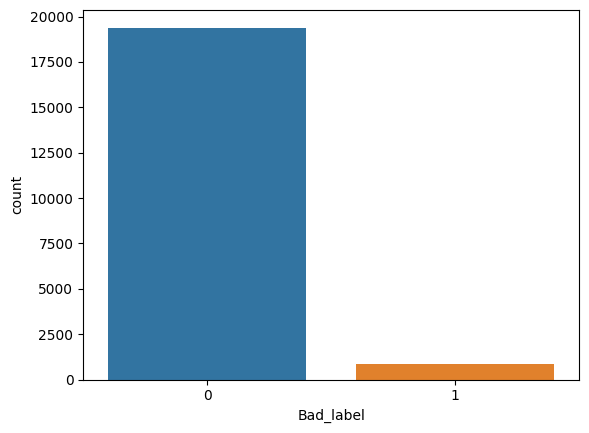

In [ ]:
#Bar plot for Bad label
sns.countplot(x=data_new["Bad_label"])
plt.show()

### Feature selection

#### Correlation for the Cust Demographics data

In [ ]:
#Correlation Matrix for Cust Demographics Data

corr_demo = data_demo.corr()
corr_demo

,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label
customer_no,1.000000,0.030951,-0.201075,NaN,-0.042023,0.490614,-0.003682,0.035919,-0.308320,-0.237760,...,0.056041,-0.150734,0.043733,-0.008920,-0.053446,0.064675,-0.554475,-0.003087,-0.009859,-0.001673
feature_3,0.030951,1.000000,-0.249718,NaN,0.310800,0.017657,0.039244,-0.115093,0.033914,-0.013347,...,-0.040672,-0.060672,-0.068242,0.111548,0.052589,0.032453,-0.363627,-0.008649,-0.005580,-0.045325
feature_4,-0.201075,-0.249718,1.000000,NaN,-0.092084,0.134901,-0.026290,0.028981,0.187323,-0.151880,...,0.076710,-0.073688,0.085511,-0.073992,0.004954,0.032819,0.101076,-0.018690,0.024449,0.017172
feature_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_7,-0.042023,0.310800,-0.092084,NaN,1.000000,-0.012511,-0.018878,-0.126560,0.086924,0.044234,...,-0.056592,-0.007181,-0.060867,0.113429,0.091288,0.000536,-0.133434,0.048114,-0.009642,-0.059418
feature_14,0.490614,0.017657,0.134901,NaN,-0.012511,1.000000,-0.017604,0.005558,0.037068,-0.590188,...,0.102585,-0.333842,0.187103,-0.036595,-0.044046,0.078982,-0.034199,-0.031554,-0.014359,-0.004178
feature_19,-0.003682,0.039244,-0.026290,NaN,-0.018878,-0.017604,1.000000,0.016425,-0.045214,-0.017524,...,-0.022053,-0.047136,-0.037647,0.029277,-0.003768,-0.008920,-0.250640,0.010211,0.003446,0.005240
feature_25,0.035919,-0.115093,0.028981,NaN,-0.126560,0.005558,0.016425,1.000000,-0.249148,-0.044601,...,0.028329,0.008867,0.071449,-0.101731,-0.027028,0.023144,-0.171602,-0.013520,0.009953,0.021890
feature_26,-0.308320,0.033914,0.187323,NaN,0.086924,0.037068,-0.045214,-0.249148,1.000000,0.088464,...,-0.012503,0.042468,-0.029659,0.014279,0.057393,0.022548,-0.009685,0.013797,0.017751,-0.024275
feature_29,-0.237760,-0.013347,-0.151880,NaN,0.044234,-0.590188,-0.017524,-0.044601,0.088464,1.000000,...,-0.152681,0.650572,-0.201126,-0.006688,0.080471,-0.049819,-0.280355,0.022391,0.028201,-0.018597


<Axes: >

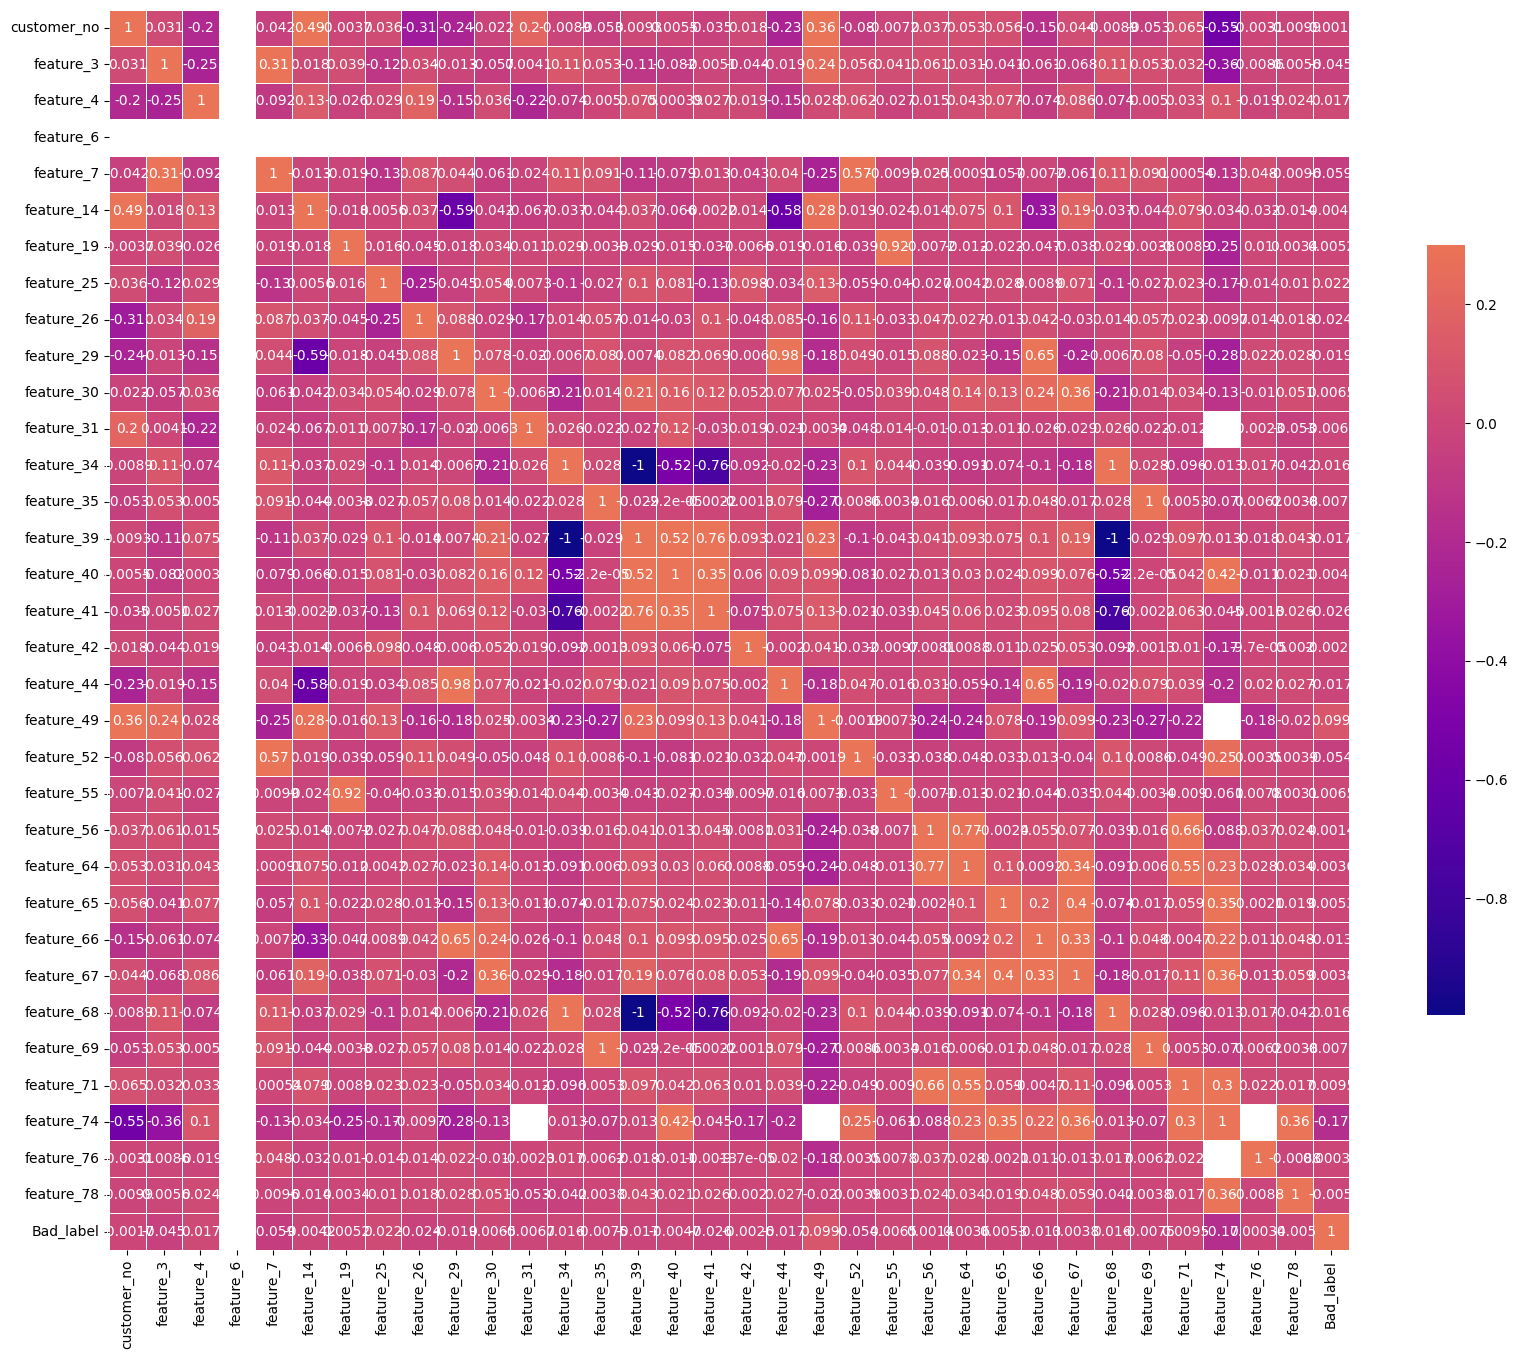

In [ ]:
#Heatmap for visualzation
plt.figure(figsize=(20,20))
sns.heatmap(corr_demo, cmap='plasma', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

#### Correlation Matrix for New combined Data


In [ ]:
#Correlation Matrix for combined data
data_new.corr()

,customer_no,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,...,feature_65,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,Bad_label,tatal_enq_amt,tatal_enq_count
customer_no,1.000000,-0.255067,-0.030135,-0.005072,0.034513,-0.325468,-0.210328,-0.023514,0.190172,0.002531,...,0.052336,0.032232,0.002531,-0.115410,0.046809,0.009640,-0.008700,0.000924,-0.018242,-0.093812
feature_4,-0.255067,1.000000,-0.056963,-0.015946,0.024124,0.266333,-0.083777,0.024582,-0.269728,-0.067645,...,0.040106,0.063453,-0.067645,0.059022,0.016880,-0.001408,0.031022,0.010260,-0.001949,0.027603
feature_7,-0.030135,-0.056963,1.000000,-0.020263,-0.130057,0.083918,0.024347,-0.053184,-0.017379,0.100345,...,-0.050311,-0.060686,0.100345,0.118615,0.001414,0.031674,-0.008167,-0.065753,0.064117,0.103159
feature_19,-0.005072,-0.015946,-0.020263,1.000000,0.021109,-0.036614,-0.018947,0.032981,0.006995,0.026666,...,-0.025704,-0.036517,0.026666,-0.008234,-0.015245,0.002867,-0.000848,0.003056,-0.006950,-0.064476
feature_25,0.034513,0.024124,-0.130057,0.021109,1.000000,-0.252597,-0.038408,0.056876,0.003692,-0.103196,...,0.029494,0.072693,-0.103196,-0.051583,0.029165,-0.020938,0.007585,0.019894,-0.069361,-0.160658
feature_26,-0.325468,0.266333,0.083918,-0.036614,-0.252597,1.000000,0.035304,-0.026604,-0.165525,0.010413,...,-0.007045,-0.018026,0.010413,0.121813,0.023989,0.021321,0.017040,-0.020353,0.022914,0.102737
feature_29,-0.210328,-0.083777,0.024347,-0.018947,-0.038408,0.035304,1.000000,0.098092,0.021856,-0.028961,...,-0.158226,-0.185719,-0.028961,0.185617,-0.024714,0.003422,0.017955,-0.009077,0.025308,0.148980
feature_30,-0.023514,0.024582,-0.053184,0.032981,0.056876,-0.026604,0.098092,1.000000,-0.007852,-0.216388,...,0.136461,0.375187,-0.216388,0.036057,0.050487,-0.010232,0.057954,0.002185,-0.022145,0.008116
feature_31,0.190172,-0.269728,-0.017379,0.006995,0.003692,-0.165525,0.021856,-0.007852,1.000000,0.020779,...,-0.018030,-0.035135,0.020779,-0.038037,-0.019070,0.000587,-0.051458,-0.006820,-0.008593,-0.027595
feature_34,0.002531,-0.067645,0.100345,0.026666,-0.103196,0.010413,-0.028961,-0.216388,0.020779,1.000000,...,-0.080593,-0.189197,1.000000,0.019448,-0.109477,0.020294,-0.042463,0.013382,0.077040,0.007528


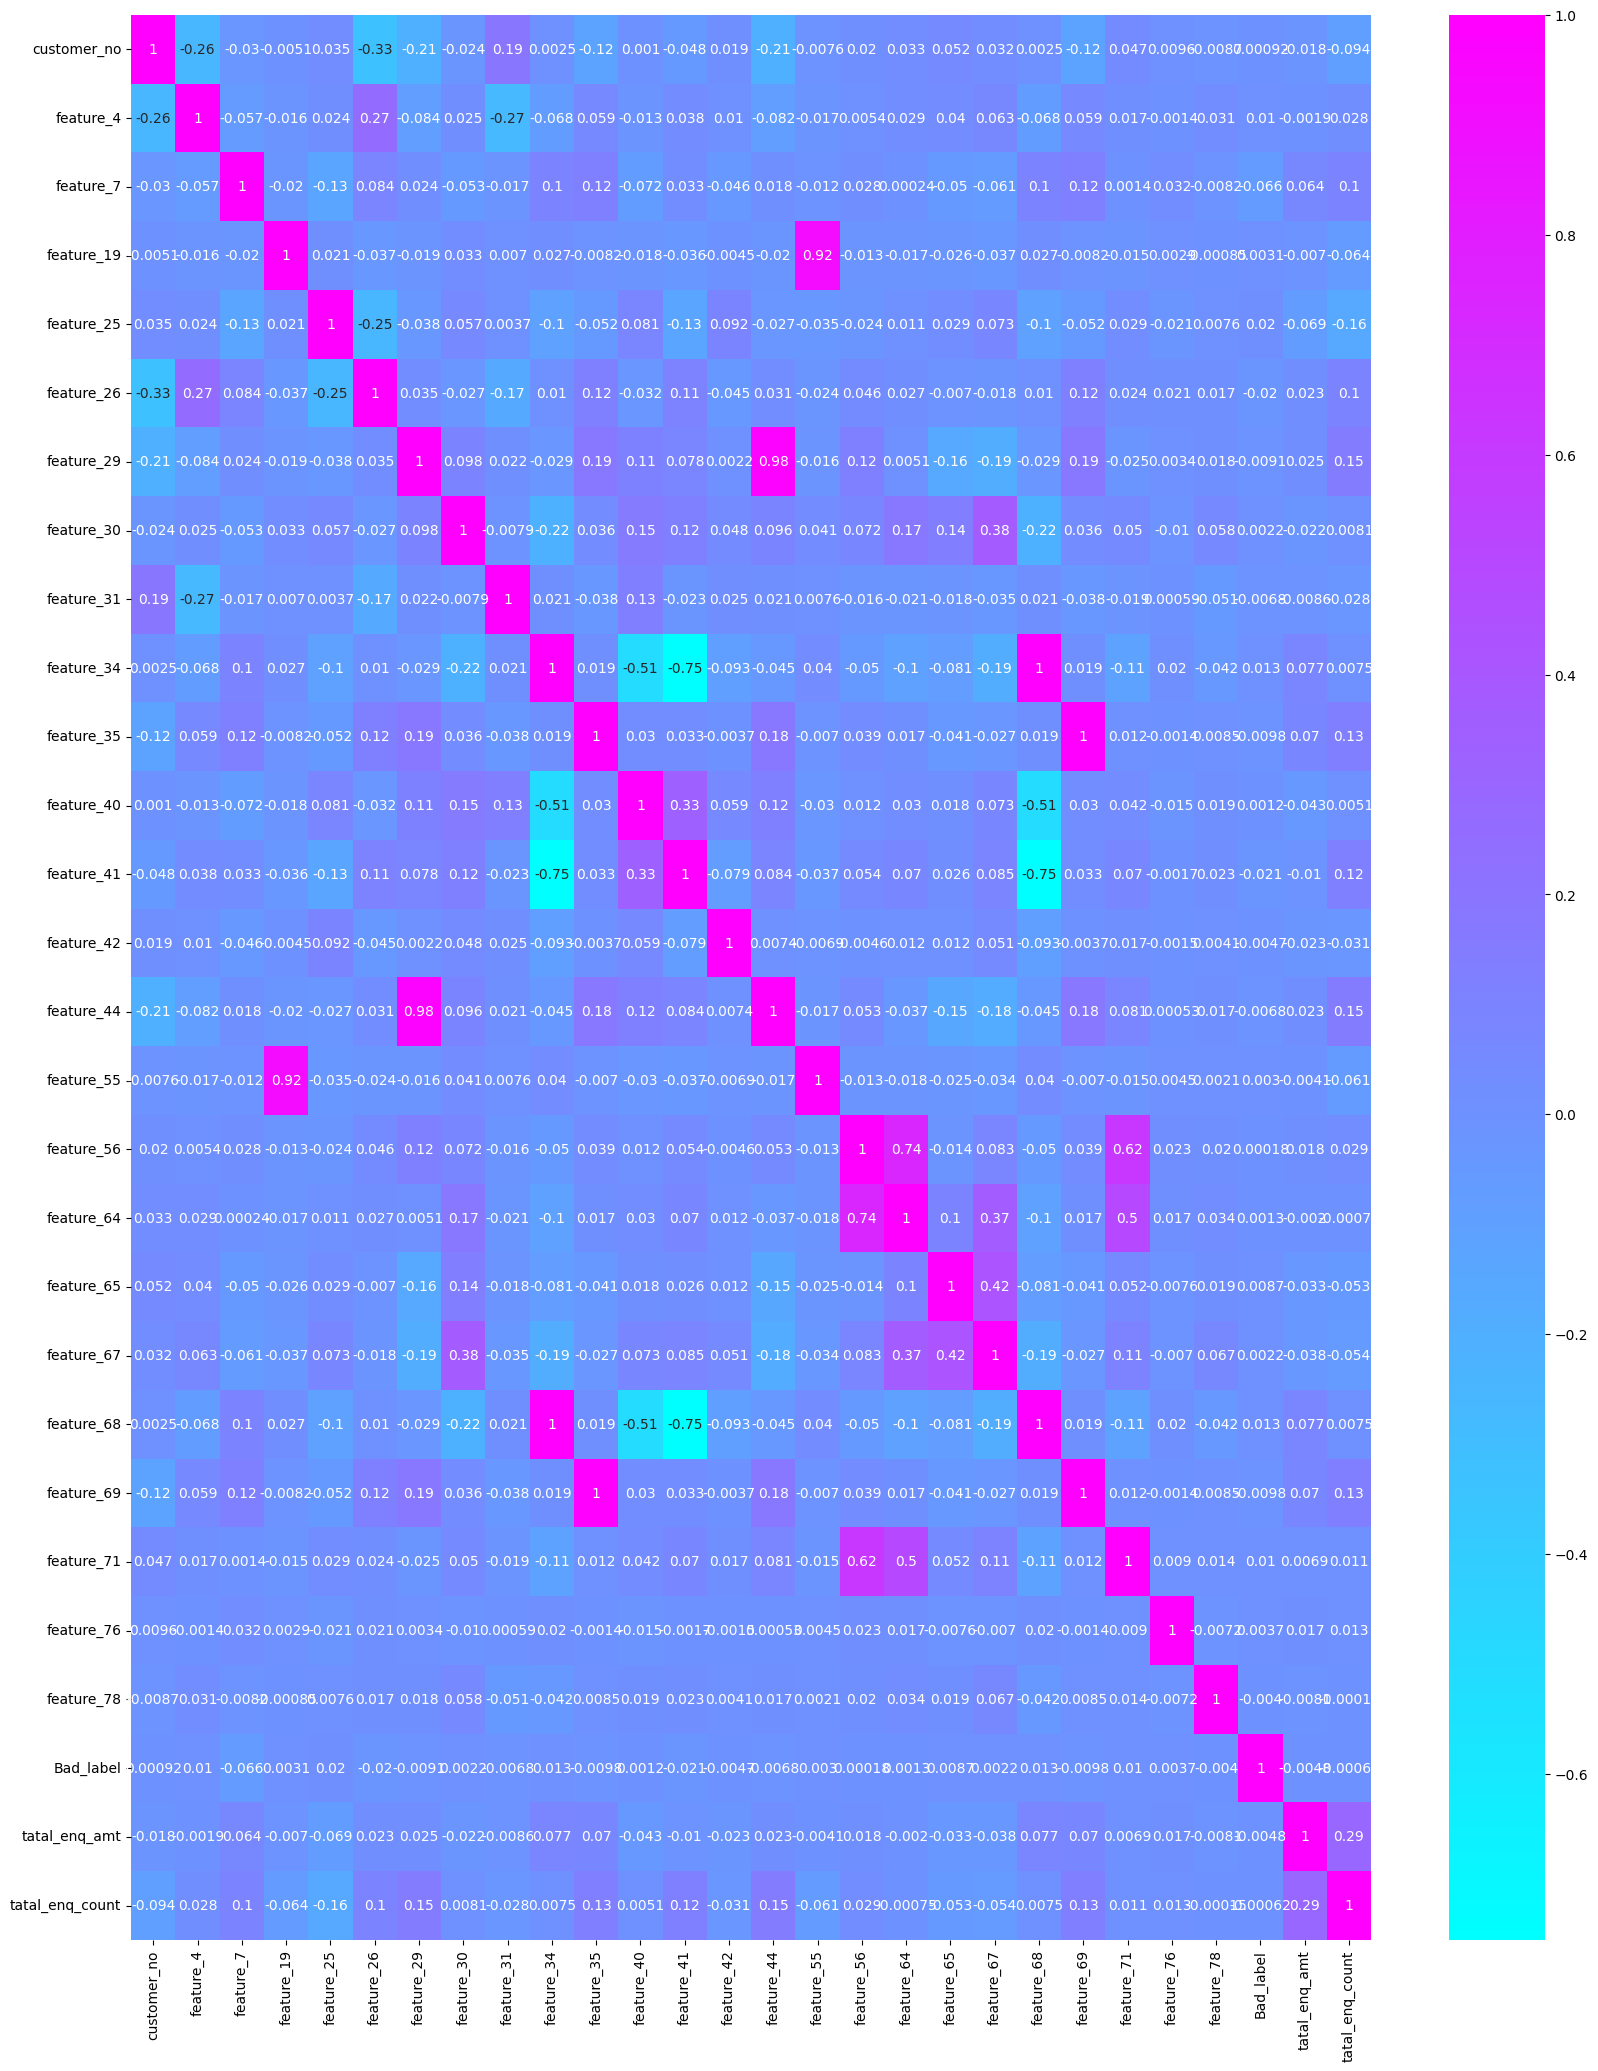

In [ ]:
#Heatmap for visualzation
plt.figure(figsize=(20,25))
sns.heatmap(data_new.corr(),annot=True,cmap='cool')
plt.show()

In [ ]:
#Checking duplicates
data_new.drop_duplicates(inplace=True)
data_new.shape

(20259, 51)

In [ ]:
data_new.duplicated().sum()

0

# Model Evaluation


## Implementing the model only on Cust_Demographics Data

As cust_demographics contains highly sensitive data and is important for our classification we will implements our models on demographics table ann observe the accuracies.


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in data3.columns:
    data3[column] = labelencoder.fit_transform(data3[column])

In [ ]:
data3.drop(labels=['feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_18',
       'feature_21','feature_23','feature_27','feature_32','feature_33','feature_36','feature_37','feature_38',
       'feature_43','feature_17','feature_18','feature_50','feature_53','feature_54','feature_57','feature_61',
       'feature_70','feature_72','feature_73'], axis=1, inplace=True)

In [ ]:
#Define X and y

X = data3.loc[:,data3.columns!='Bad_label']
y = data3.Bad_label

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,confusion_matrix,classification_report

In [ ]:
#Splitting the data into training data and testing data using train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (16727, 57)
X_test shape =  (7169, 57)
y_train shape =  (16727,)
y_test shape =  (7169,)


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   dt_opened    23896 non-null  int64
 1   customer_no  23896 non-null  int64
 2   entry_time   23896 non-null  int64
 3   feature_1    23896 non-null  int64
 4   feature_2    23896 non-null  int64
 5   feature_3    23896 non-null  int64
 6   feature_4    23896 non-null  int64
 7   feature_5    23896 non-null  int64
 8   feature_6    23896 non-null  int64
 9   feature_7    23896 non-null  int64
 10  feature_14   23896 non-null  int64
 11  feature_15   23896 non-null  int64
 12  feature_16   23896 non-null  int64
 13  feature_19   23896 non-null  int64
 14  feature_20   23896 non-null  int64
 15  feature_22   23896 non-null  int64
 16  feature_24   23896 non-null  int64
 17  feature_25   23896 non-null  int64
 18  feature_26   23896 non-null  int64
 19  feature_28   23896 non-null  int64
 20  featur

 Model Feature Importances of a Random Forest Classifier =  [0.  0.2 0.2 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]


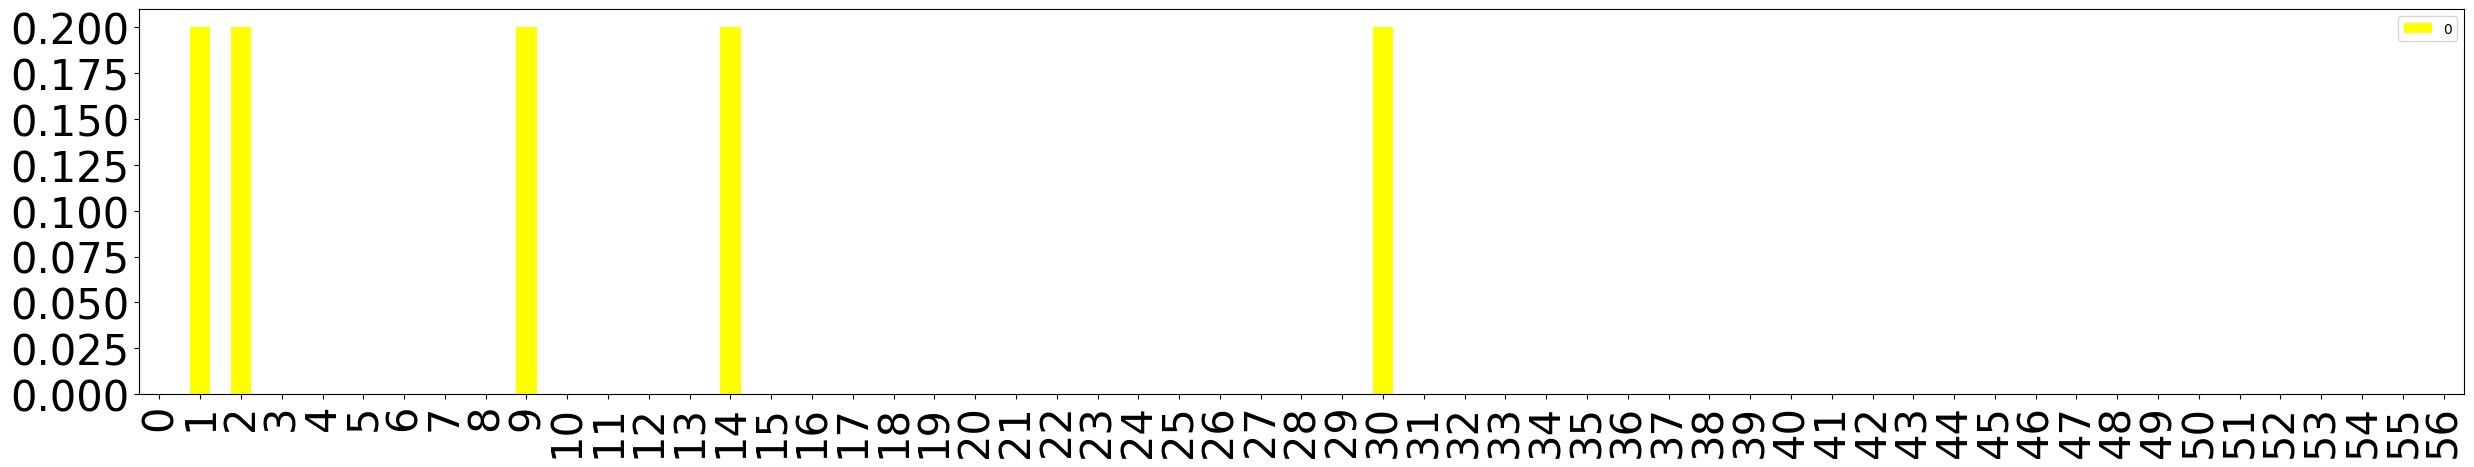

In [ ]:
#Model creation
model_rf=RandomForestClassifier(n_estimators=5,criterion="gini",max_depth=1,n_jobs=2,random_state=5)
model_rf.fit(X_train,y_train)
print(" Model Feature Importances of a Random Forest Classifier = " ,model_rf.feature_importances_)
feature_importances_rf=pd.DataFrame(model_rf.feature_importances_)
feature_importances_rf.plot(kind='bar',color='yellow',figsize=(30,5),fontsize=30)
y_train_predict=model_rf.predict(X_train)
y_predict=model_rf.predict(X_test)

In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,6861,6861
1,308,308
All,7169,7169


In [ ]:
print(confusion_matrix(y_test,y_predict))


[[6861    0]
 [ 308    0]]


In [ ]:
#Accuracies and Recall, F1 scores

print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  95.83906259341185
Accuracy of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



Receiver Operating Characteristics (ROC) Curve

No state AUC score = 0.500 
Random Forest AUC score = 0.576 


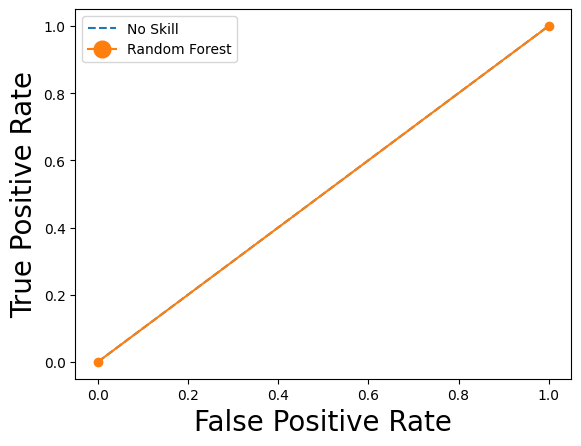

In [ ]:
#ROC

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model_rf.predict_proba(X_test)
rf_probability = rf_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

Random forest: f1=0.000 auc=0.056


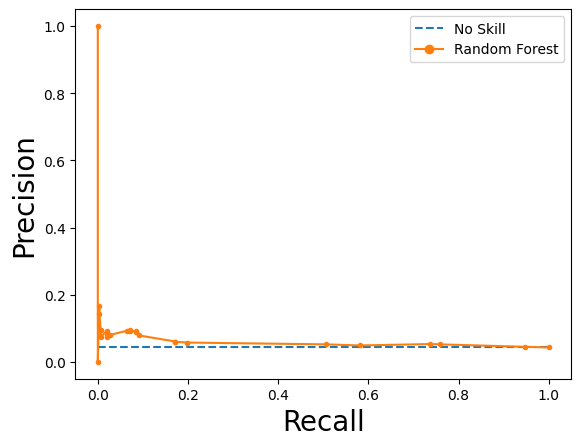

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
rf_probability = model_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model_rf.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### Decision Tree Classifier

 Model Feature Importances of a Decision Tree Classifier =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


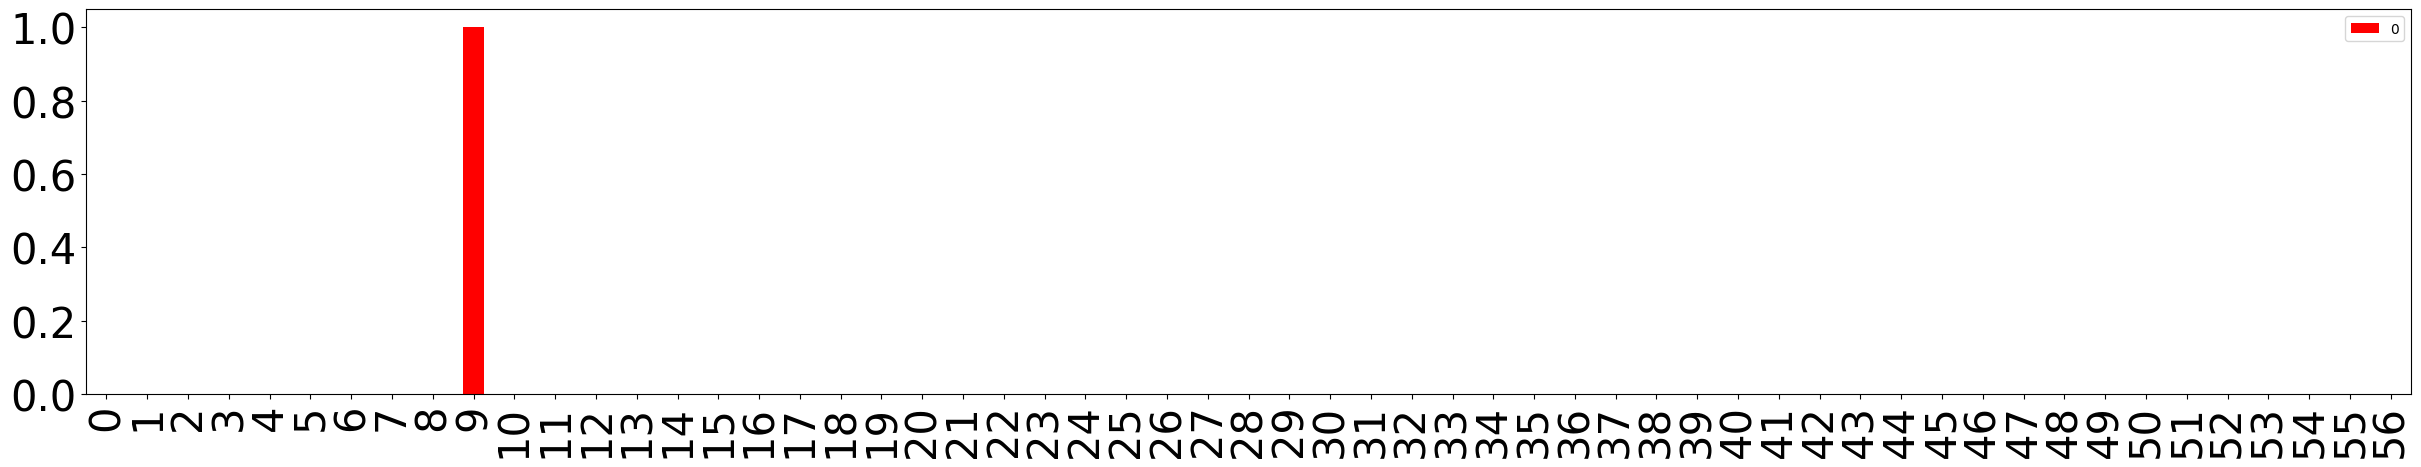

In [ ]:
#Model creation
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(splitter='best',criterion="gini",max_depth=1,random_state=5)
model_dt.fit(X_train,y_train)
print(" Model Feature Importances of a Decision Tree Classifier = " ,model_dt.feature_importances_)
feature_importances_dt=pd.DataFrame(model_dt.feature_importances_)
feature_importances_dt.plot(kind='bar',color='red',figsize=(30,5),fontsize=30)
y_train_predict=model_dt.predict(X_train)
y_predict=model_dt.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict))


[[6861    0]
 [ 308    0]]


In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,6861,6861
1,308,308
All,7169,7169


In [ ]:
#Accuracies

print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  95.83906259341185
Accuracy of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



No state AUC score = 0.500 
Decision Tree AUC score = 0.586 


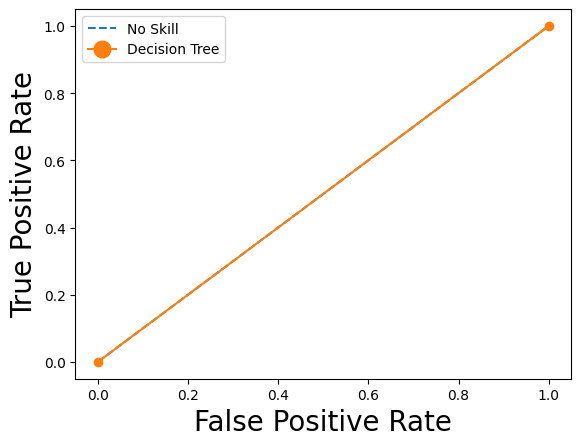

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
dt_probability=model_dt.predict_proba(X_test)
dt_probability = dt_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
dt_auc=roc_auc_score(y_test,dt_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Decision Tree AUC score = %.3f " %(dt_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
dt_fpr, dt_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

Decision Tree: f1=0.000 auc=0.361


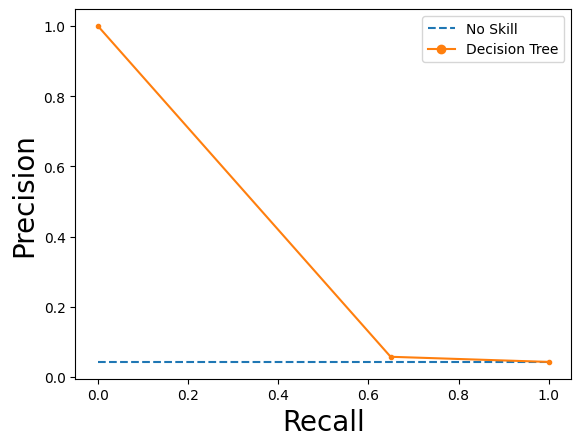

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
dt_probability = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probability = dt_probability[:, 1]
# predict class values
y_predict = model_dt.predict(X_test)
dt_precision, dt_recall,i = precision_recall_curve(y_test, dt_probability)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### XGBoost Classifier

In [ ]:
#Model creation
from xgboost import XGBClassifier
model_xgb=XGBClassifier(max_depth=1,learning_rate=0.1,test_size=0.3,n_estimators=5,n_jobs=1,random_state=5,gamma=0.1)
model_xgb.fit(X_train,y_train)
print(" Model Feature Importances of a XGBoost Classifier = " ,model_xgb.feature_importances_)

[10:52:30] WARNING: ../src/learner.cc:767: 
Parameters: { "test_size" } are not used.

 Model Feature Importances of a XGBoost Classifier =  [0.         0.         0.         0.         0.         0.32088426
 0.         0.         0.         0.34175476 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.33736098 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


<Axes: >

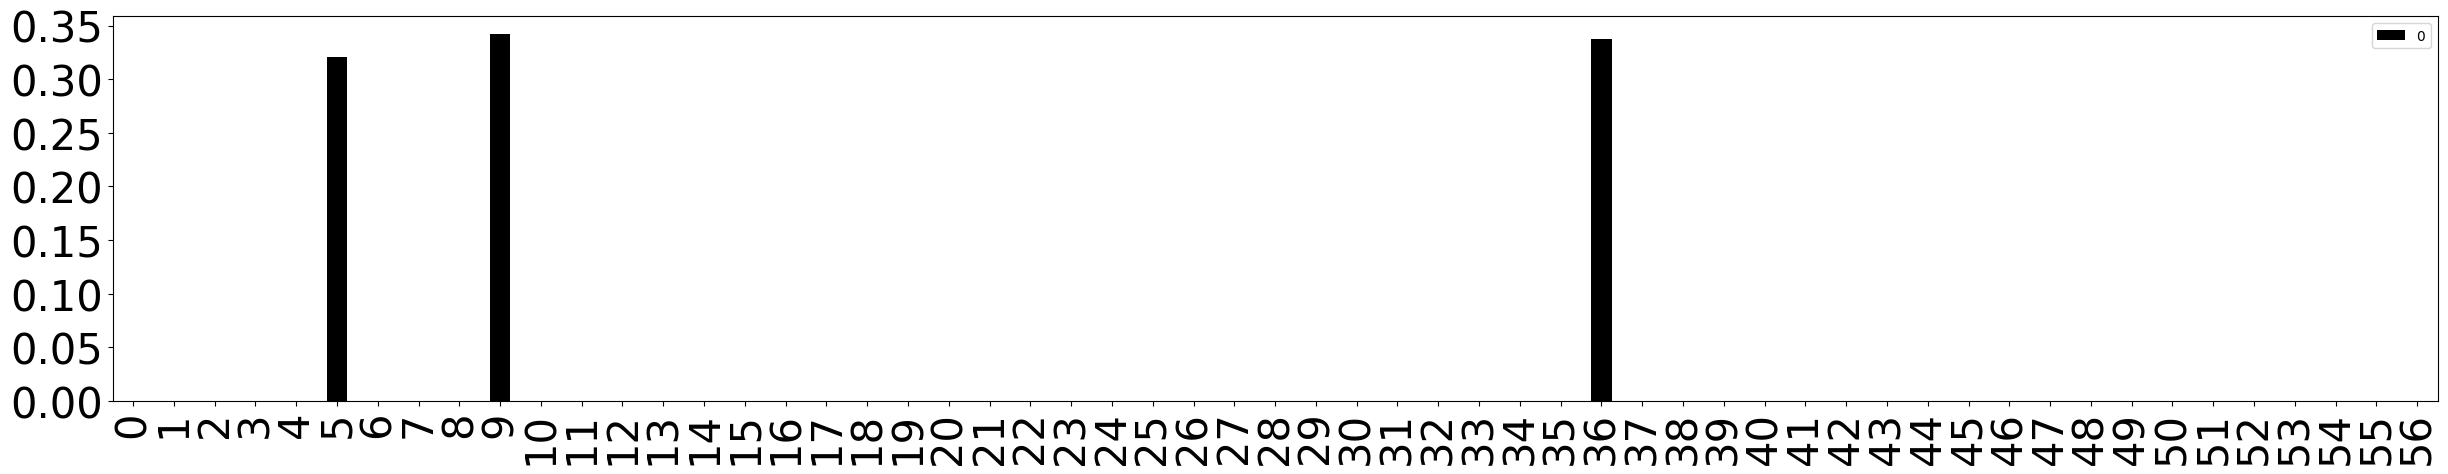

In [ ]:
feature_importances_xgb=pd.DataFrame(model_xgb.feature_importances_)
feature_importances_xgb.plot(kind='bar',color='black',figsize=(30,5),fontsize=30)

In [ ]:
y_train_predict=model_xgb.predict(X_train)
y_predict=model_xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)

[[6861    0]
 [ 308    0]]


col_0,0,All
Bad_label,,
0,6861,6861
1,308,308
All,7169,7169


In [ ]:
#Accuracies

print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy score of Training =  95.83906259341185
Accuracy score of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



No state AUC score = 0.500 
XGBoost AUC score = 0.638 


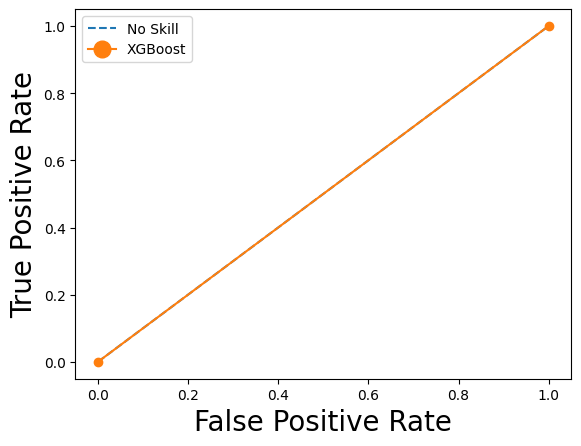

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model_xgb.predict_proba(X_test)
xgb_probability = xgb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

XGBoost: f1=0.000 auc=0.269


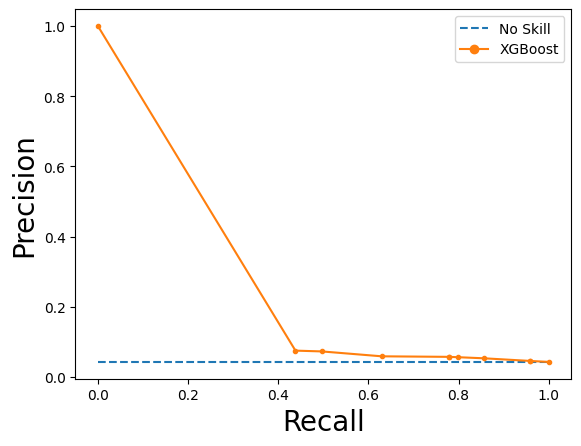

In [ ]:
#Precision-Recall Curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probability = model_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model_xgb.predict(X_test)
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1,xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### Logistic Regression

Model Feature Importances of a Logistic Regression =  [-2.96109417e-03 -1.98102967e-05 -6.27207138e-04 -1.25979382e-04
  4.46146776e-04 -3.63094458e-03 -1.79201630e-05 -2.55827918e-05
 -2.55827918e-05  5.37352006e-04 -7.89228758e-05 -3.92408709e-03
 -2.21538956e-04 -2.82384141e-05  6.66545690e-05 -1.86576040e-04
 -5.41643143e-04 -1.62356798e-05 -7.69031030e-05 -1.02098748e-03
 -1.00151972e-03 -2.65937730e-04 -4.72103966e-05 -2.13117898e-05
 -6.73912913e-06 -2.93087508e-04 -1.04150765e-04 -9.35336645e-05
 -5.02843921e-05 -1.80331582e-04 -2.88729834e-05 -6.64776743e-05
 -6.22679786e-05 -6.21386912e-04 -1.14174769e-05 -1.80593957e-04
 -5.39630787e-04 -2.98315624e-05 -5.18868718e-06 -3.22320935e-05
 -5.43736559e-05 -3.10796689e-05 -5.11062748e-05 -6.77504363e-04
  6.32679105e-05 -4.52256693e-04 -6.36028229e-05 -2.11097331e-05
 -2.13117898e-05 -6.73912913e-06 -2.00814977e-05 -2.27873772e-08
 -2.58368424e-05 -2.58779360e-05 -2.39386697e-07 -2.64569253e-05
 -2.56599494e-05]


<Axes: >

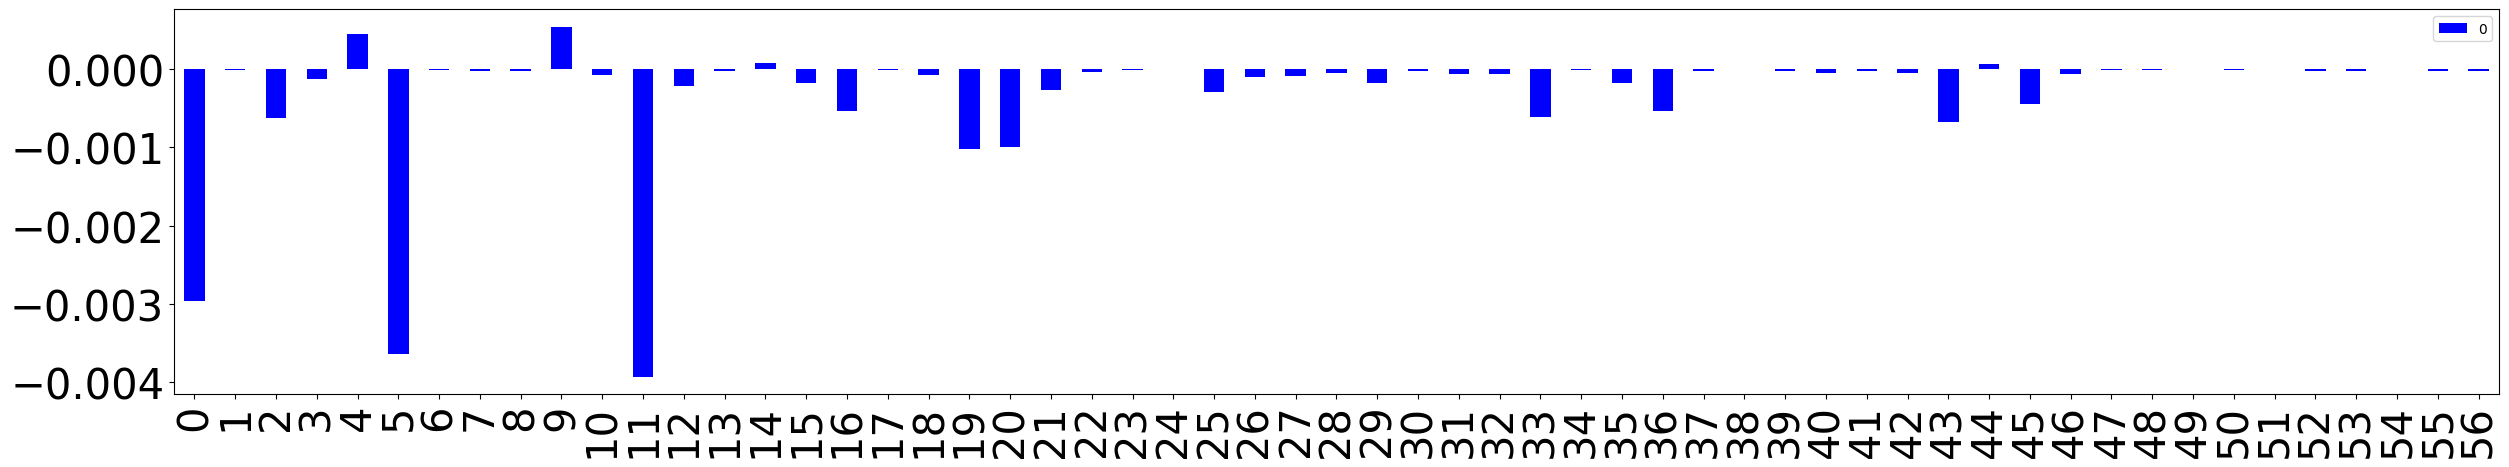

In [ ]:
#Model creation
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print("Model Feature Importances of a Logistic Regression = ", model_lr.coef_[0])
feature_importances_lr=pd.DataFrame(model_lr.coef_[0])
feature_importances_lr.plot(kind='bar',color='blue',figsize=(30,5),fontsize=30)

In [ ]:
y_train_predict=model_lr.predict(X_train)
y_predict=model_lr.predict(X_test)

In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,6861,6861
1,308,308
All,7169,7169


In [ ]:
#Accuracies

print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[6861    0]
 [ 308    0]]
Accuracy score of Training =  95.83906259341185
Accuracy score of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



No state AUC score = 0.500 
Logistic Regression AUC score = 0.581 


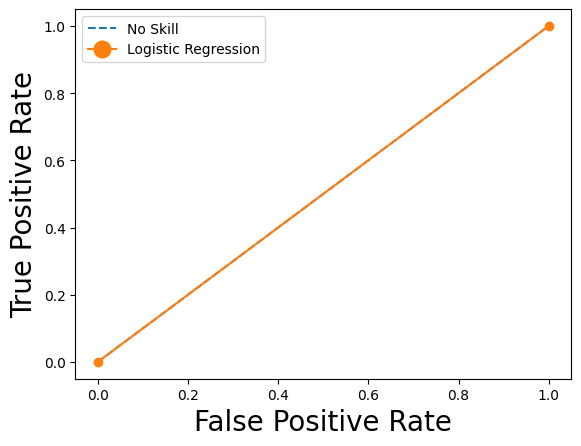

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
lr_probability=model_lr.predict_proba(X_test)
lr_probability = lr_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
lr_auc=roc_auc_score(y_test,lr_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Logistic Regression AUC score = %.3f " %(lr_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
lr_fpr, lr_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='o', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

Logistic Regression: f1=0.000 auc=0.054


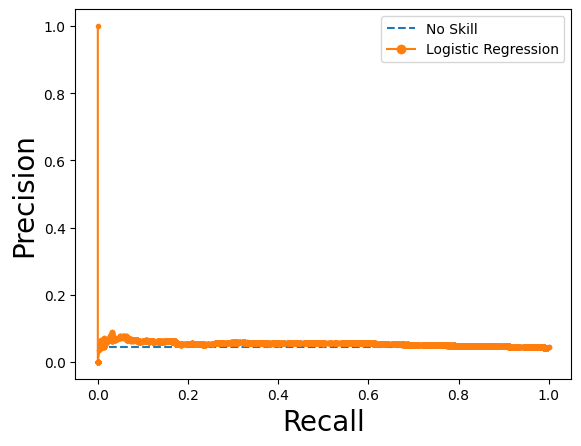

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
lr_probability = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probability = lr_probability[:, 1]
# predict class values
y_predict = model_lr.predict(X_test)
lr_precision, lr_recall,i = precision_recall_curve(y_test, lr_probability)
lr_f1,lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Implementing the model on combined data

In [ ]:
#Converting object values into integer using Label encoder
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

cols = ['feature_1','feature_5','feature_11','feature_23','feature_27','feature_32',
        'feature_33','feature_36','feature_37','feature_46','feature_48','feature_58',
        'feature_59','feature_60','feature_62','feature_72','feature_79','high_credit_amt',
        'cur_balance_amt','amt_past_due','creditlimit','cashlimit']

# Encoding labels of multiple columns at once

data_new[cols] = data_new[cols].apply(LabelEncoder().fit_transform)

In [ ]:
data_new.head()

,customer_no,customer_no,feature_1,feature_4,feature_5,feature_7,feature_11,feature_19,feature_23,feature_25,...,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,tatal_enq_amt,tatal_enq_count
47,48,1004,1,3.0,0,50000.0,1,1.0,1,1.0,...,1.0,0,0,3613,494,320,5118,1645,96311029.0,117
50,51,10042,1,3.0,0,390000.0,0,1.0,0,1.0,...,1.0,0,0,3341,15975,320,5540,2,293483609.0,97
51,52,10043,1,1.0,0,500000.0,1,1.0,0,1.0,...,1.0,0,0,19289,18999,320,5752,1365,22451000.0,8
54,55,10046,1,1.0,0,338000.0,1,1.0,1,1.0,...,1.0,0,0,6592,3104,320,2687,2446,116000.0,4
55,56,10047,4,3.0,0,133000.0,1,1.0,1,2.0,...,1.0,0,0,5373,8225,320,4516,2,262001.0,9


In [ ]:
#Define X and y

X = data_new.loc[:,data_new.columns!='Bad_label']
y = data_new.Bad_label

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (14181, 50)
X_test shape =  (6078, 50)
y_train shape =  (14181,)
y_test shape =  (6078,)


### Random Forest

 Model Feature Importances of a Random Forest Classifier =  [0.1 0.1 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.1 0.  0.
 0.  0.  0.  0.  0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.1 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0. ]


<Axes: >

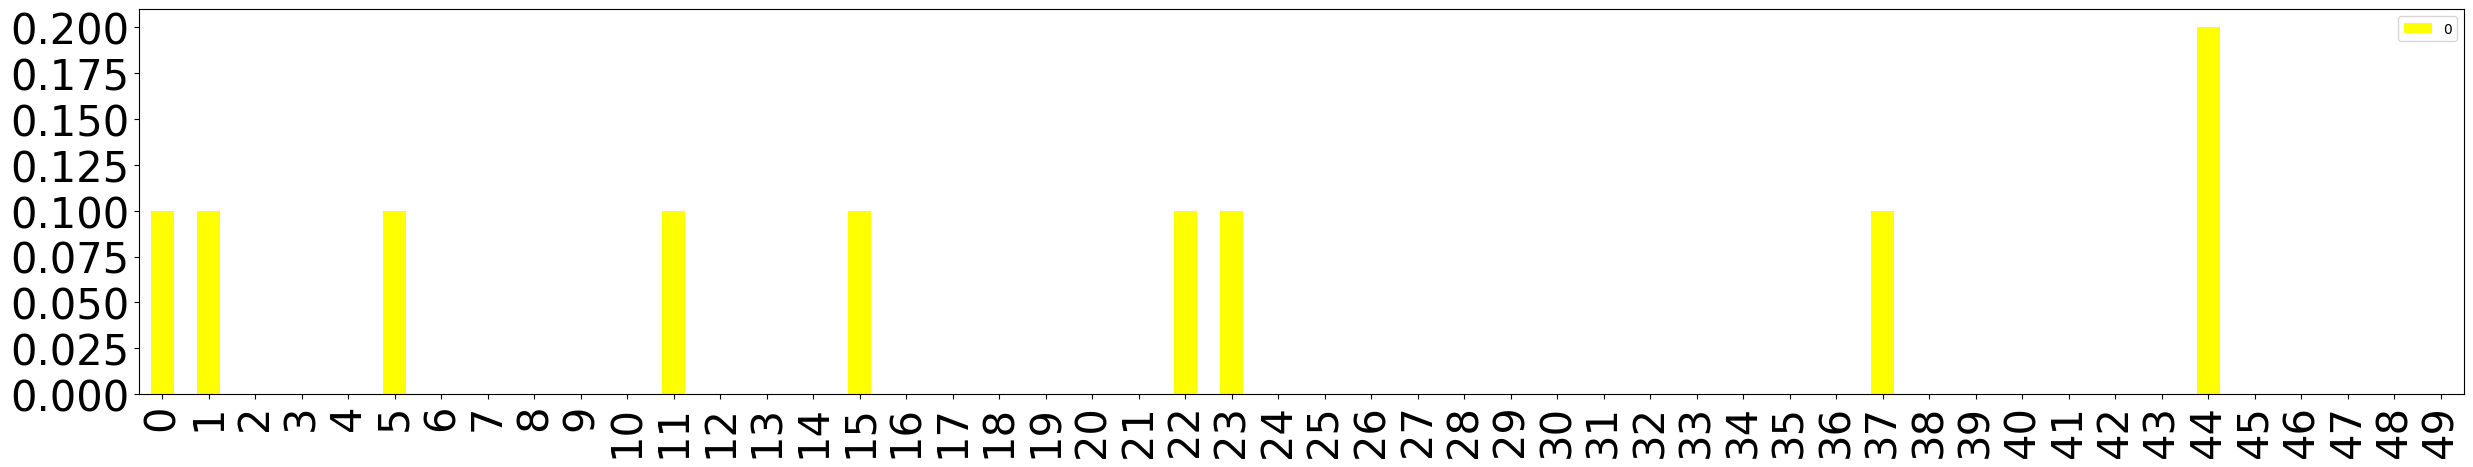

In [ ]:
#Model creation

model_rf=RandomForestClassifier(n_estimators=10,criterion="gini",max_depth=1,n_jobs=1,random_state=5)
model_rf.fit(X_train,y_train)
print(" Model Feature Importances of a Random Forest Classifier = " ,model_rf.feature_importances_)
feature_importances_rf=pd.DataFrame(model_rf.feature_importances_)
feature_importances_rf.plot(kind='bar',color='yellow',figsize=(30,5),fontsize=30)

In [ ]:
y_train_predict=model_rf.predict(X_train)
y_predict=model_rf.predict(X_test)

In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,5807,5807
1,271,271
All,6078,6078


In [ ]:
#Accuracies and Recall, F1 scores

print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[5807    0]
 [ 271    0]]
Accuracy score of Training =  95.79014173894647
Accuracy score of Testing =  95.54129647910497
Precision score =  91.28139332908236
Recall score =  95.54129647910497
F1 score =  93.36277806548802
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5807
           1       0.00      0.00      0.00       271

    accuracy                           0.96      6078
   macro avg       0.48      0.50      0.49      6078
weighted avg       0.91      0.96      0.93      6078



No state AUC score = 0.500 
Random Forest AUC score = 0.590 


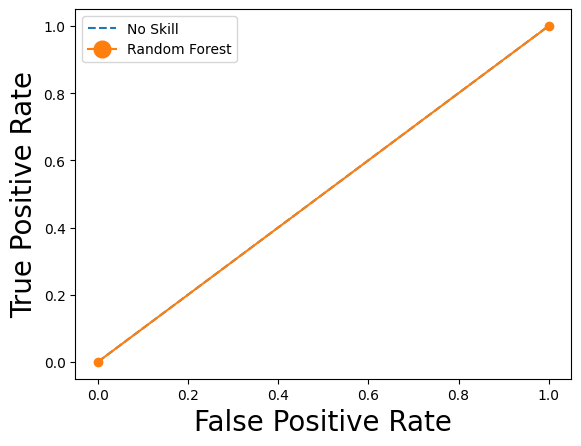

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model_rf.predict_proba(X_test)
rf_probability = rf_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

Random forest: f1=0.000 auc=0.057


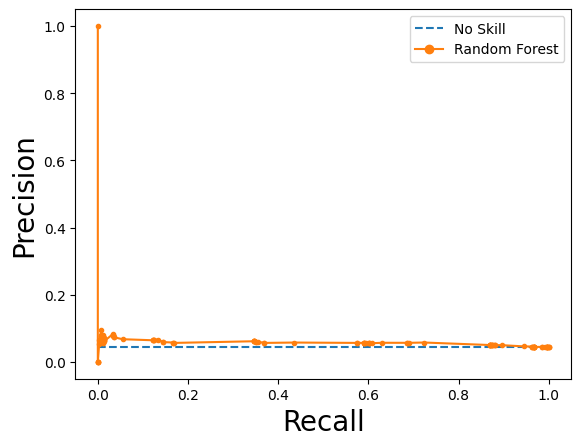

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
rf_probability = model_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model_rf.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### Decision Tree Classifier

 Model Feature Importances of a Decision Tree Classifier =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


<Axes: >

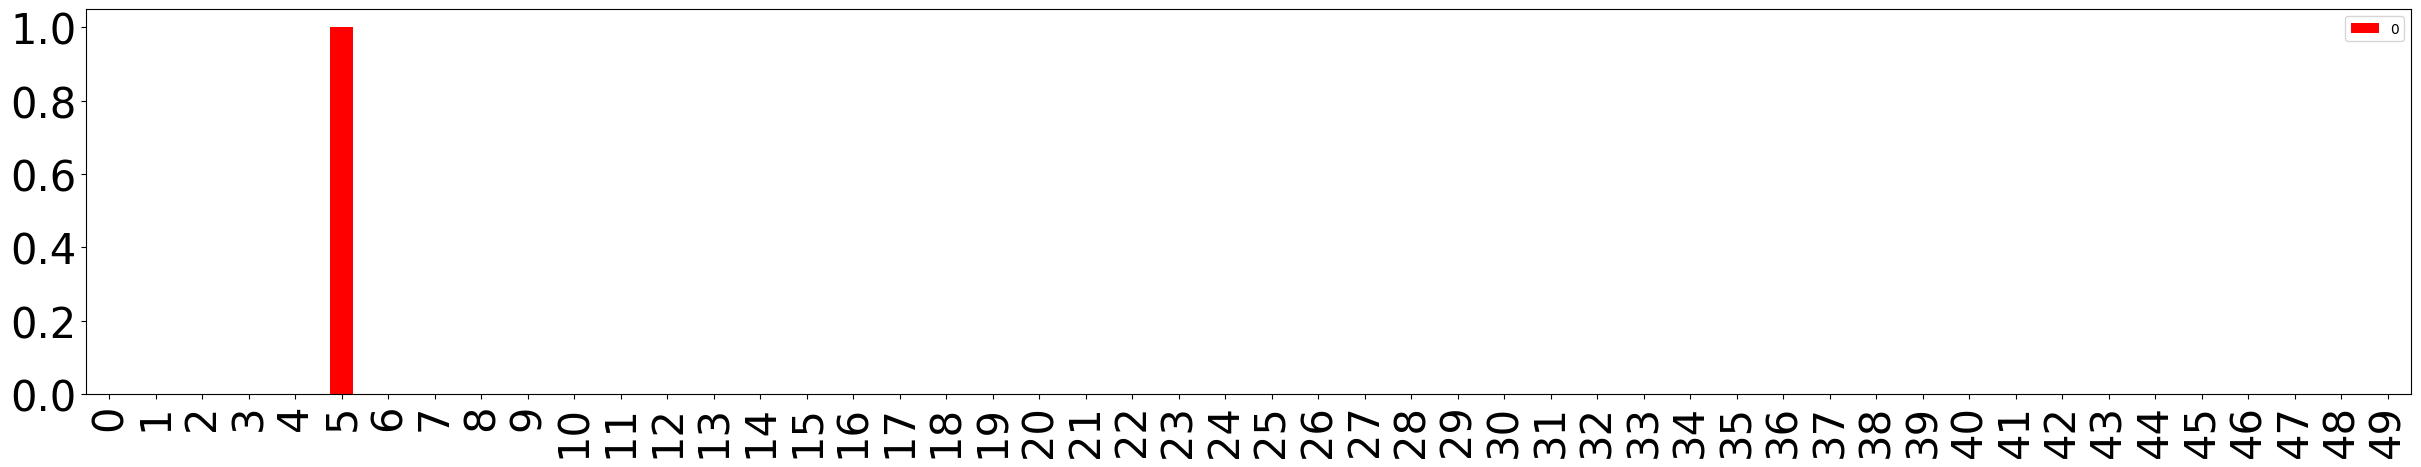

In [ ]:
#Model creation

model_dt=DecisionTreeClassifier(splitter='best',criterion="gini",max_depth=1,random_state=5)
model_dt.fit(X_train,y_train)
print(" Model Feature Importances of a Decision Tree Classifier = " ,model_dt.feature_importances_)
feature_importances_dt=pd.DataFrame(model_dt.feature_importances_)
feature_importances_dt.plot(kind='bar',color='red',figsize=(30,5),fontsize=30)

In [ ]:
y_train_predict=model_dt.predict(X_train)
y_predict=model_dt.predict(X_test)

In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,5807,5807
1,271,271
All,6078,6078


In [ ]:
#Accuracies

print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[5807    0]
 [ 271    0]]
Accuracy score of Training =  95.79014173894647
Accuracy score of Testing =  95.54129647910497
Precision score =  91.28139332908236
Recall score =  95.54129647910497
F1 score =  93.36277806548802
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5807
           1       0.00      0.00      0.00       271

    accuracy                           0.96      6078
   macro avg       0.48      0.50      0.49      6078
weighted avg       0.91      0.96      0.93      6078



No state AUC score = 0.500 
Decision Tree AUC score = 0.571 


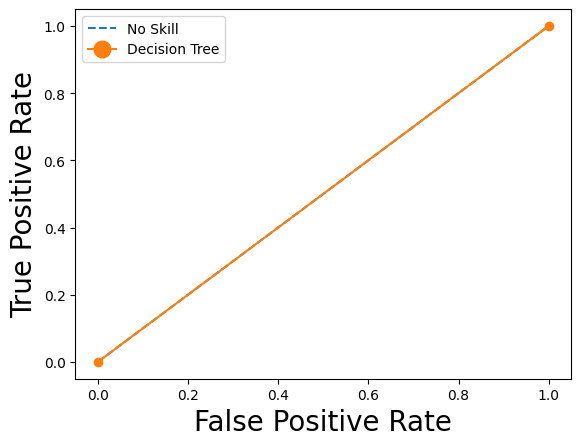

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
dt_probability=model_dt.predict_proba(X_test)
dt_probability = dt_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
dt_auc=roc_auc_score(y_test,dt_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Decision Tree AUC score = %.3f " %(dt_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
dt_fpr, dt_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

Decision Tree: f1=0.000 auc=0.278


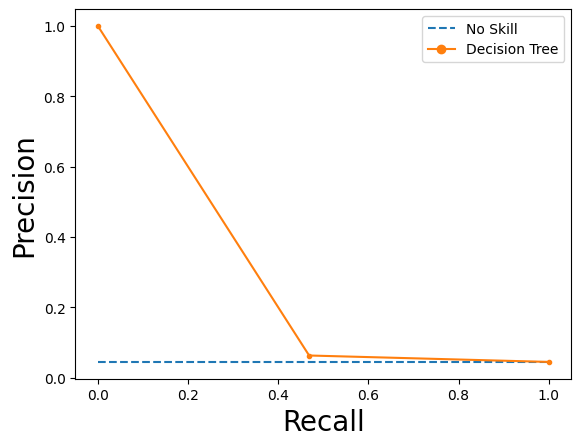

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
dt_probability = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probability = dt_probability[:, 1]
# predict class values
y_predict = model_dt.predict(X_test)
dt_precision, dt_recall,i = precision_recall_curve(y_test, dt_probability)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### XGBoost Classifier

[10:42:15] WARNING: ../src/learner.cc:767: 
Parameters: { "test_size" } are not used.

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5807
           1       0.00      0.00      0.00       271

    accuracy                           0.96      6078
   macro avg       0.48      0.50      0.49      6078
weighted avg       0.91      0.96      0.93      6078

 Model Feature Importances of a XGBoost Classifier =  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


<Axes: >

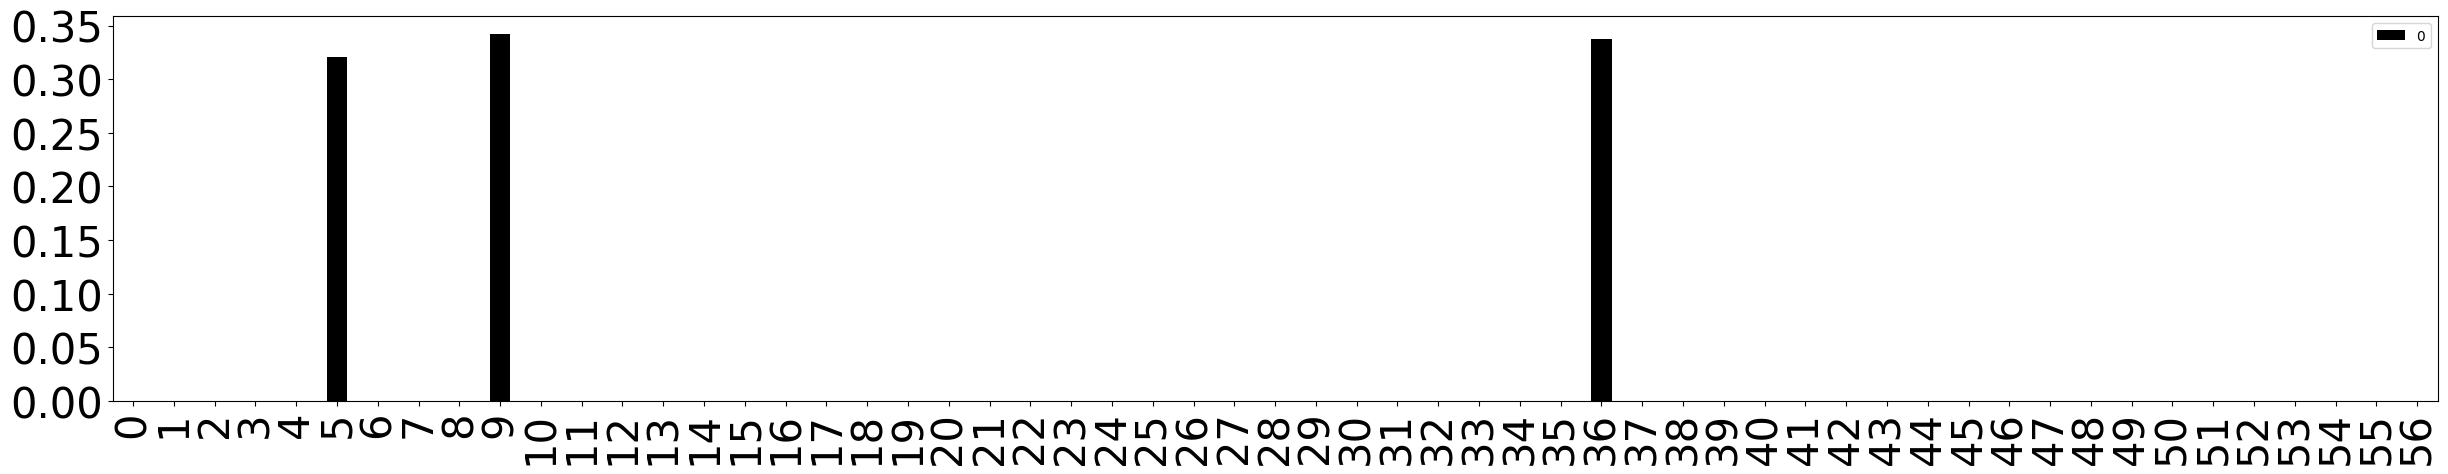

In [ ]:
#Model creation
from xgboost import XGBClassifier
model_xgb=XGBClassifier(max_depth=1,learning_rate=0.1,test_size=0.3,n_estimators=5,n_jobs=1,random_state=5,gamma=0.1)

hr_pred = model_xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())
print(classification_report(y_test, hr_pred))

print(" Model Feature Importances of a XGBoost Classifier = " ,model_xgb.feature_importances_)
eature_importances_xgb=pd.DataFrame(model_xgb.feature_importances_)
feature_importances_xgb.plot(kind='bar',color='black',figsize=(30,5),fontsize=30)

In [ ]:
y_train_predict=model_xgb.predict(X_train._get_numeric_data())
y_predict=model_xgb.predict(X_test._get_numeric_data())

In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,5807,5807
1,271,271
All,6078,6078


In [ ]:
#Accuracies
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[5807    0]
 [ 271    0]]
Accuracy score of Training =  95.79014173894647
Accuracy score of Testing =  95.54129647910497
Precision score =  91.28139332908236
Recall score =  95.54129647910497
F1 score =  93.36277806548802
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5807
           1       0.00      0.00      0.00       271

    accuracy                           0.96      6078
   macro avg       0.48      0.50      0.49      6078
weighted avg       0.91      0.96      0.93      6078



No state AUC score = 0.500 
XGBoost AUC score = 0.577 


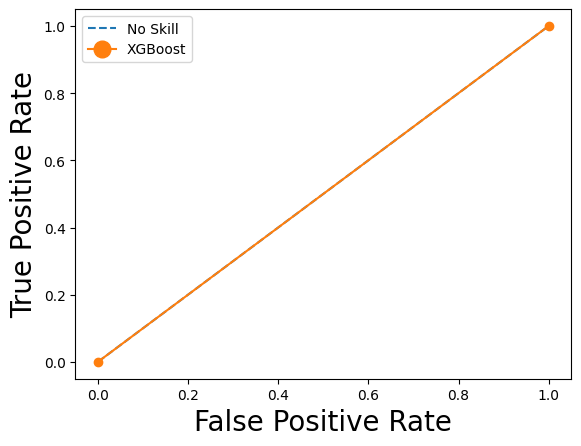

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model_xgb.predict_proba(X_test._get_numeric_data())
xgb_probability = xgb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

XGBoost: f1=0.000 auc=0.196


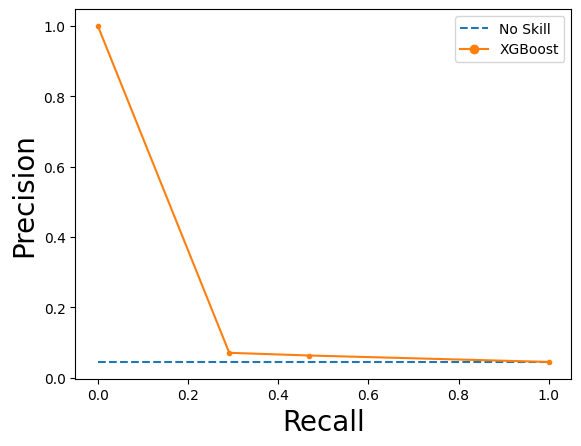

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probability = model_xgb.predict_proba(X_test._get_numeric_data())
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model_xgb.predict(X_test._get_numeric_data())
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1,xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### Logistic Regression

Model Feature Importances of a Logistic Regression =  [-4.31713890e-05 -1.13031826e-05 -1.34995087e-08 -8.64210172e-09
  0.00000000e+00 -1.38055889e-05 -2.96594719e-09 -3.38554793e-09
 -3.19883623e-10 -4.14525617e-09 -2.65424649e-09 -1.70785352e-08
 -1.66685279e-06 -6.25346703e-06 -3.11336130e-09 -9.48786906e-09
 -1.97180641e-09 -3.04432157e-09 -1.51766361e-06 -1.87178319e-08
 -3.44567534e-09 -1.19812596e-08 -2.02612513e-08 -6.92344403e-10
 -3.25676355e-09 -6.36187286e-09 -1.49601533e-07 -3.56234106e-09
 -3.80118517e-08 -3.91938950e-11 -2.96594719e-09 -1.32924945e-11
 -3.12474199e-09 -5.08636894e-08 -7.33739421e-07 -1.15336835e-09
 -3.04432157e-09 -1.51766361e-06 -3.75872450e-08 -1.20010588e-09
  1.70335044e-11 -3.30869189e-09 -8.42628814e-12 -2.77784367e-05
 -2.97599778e-05 -1.00469354e-06 -1.59314729e-05 -6.41990701e-06
 -5.80335984e-12 -1.84329558e-08]


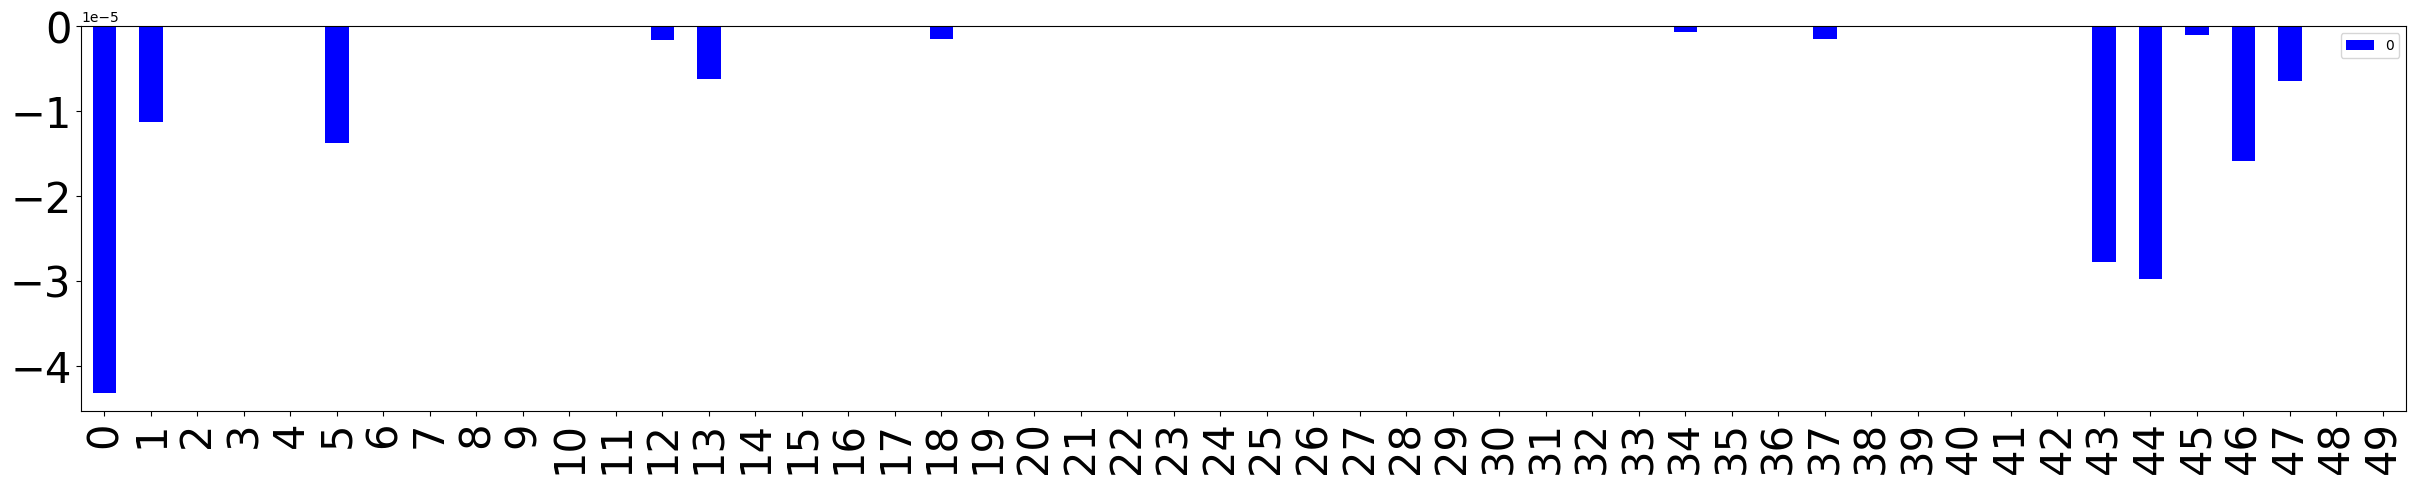

In [ ]:
#Model creation
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print("Model Feature Importances of a Logistic Regression = ", model_lr.coef_[0])
feature_importances_lr=pd.DataFrame(model_lr.coef_[0])
feature_importances_lr.plot(kind='bar',color='blue',figsize=(30,5),fontsize=30)
y_train_predict=model_lr.predict(X_train)
y_predict=model_lr.predict(X_test)

In [ ]:
pd.crosstab(y_test,y_predict,margins=any)

col_0,0,All
Bad_label,,
0,5807,5807
1,271,271
All,6078,6078


In [ ]:
#Accuracies

print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[5807    0]
 [ 271    0]]
Accuracy score of Training =  95.79014173894647
Accuracy score of Testing =  95.54129647910497
Precision score =  91.28139332908236
Recall score =  95.54129647910497
F1 score =  93.36277806548802
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5807
           1       0.00      0.00      0.00       271

    accuracy                           0.96      6078
   macro avg       0.48      0.50      0.49      6078
weighted avg       0.91      0.96      0.93      6078



No state AUC score = 0.500 
Logistic Regression AUC score = 0.580 


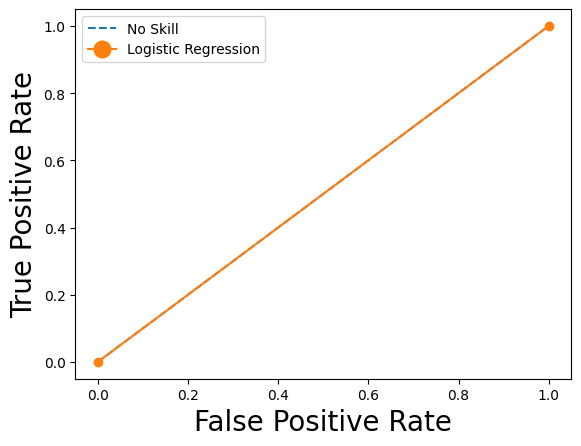

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
lr_probability=model_lr.predict_proba(X_test)
lr_probability = lr_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
lr_auc=roc_auc_score(y_test,lr_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Logistic Regression AUC score = %.3f " %(lr_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
lr_fpr, lr_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='o', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

Logistic Regression: f1=0.000 auc=0.066


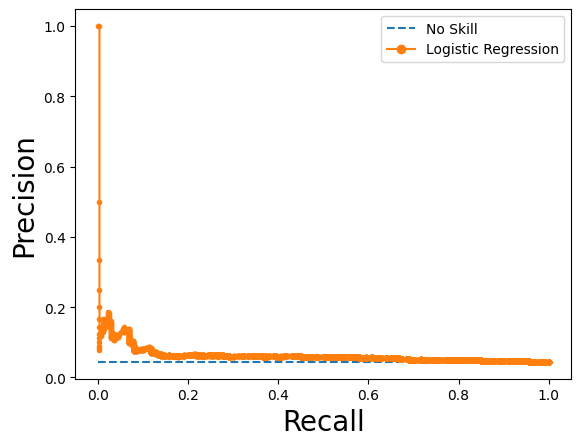

In [ ]:
#from sklearn.metrics import auc

from sklearn.metrics import precision_recall_curve
# predict probabilities
lr_probability = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probability = lr_probability[:, 1]
# predict class values
y_predict = model_lr.predict(X_test)
lr_precision, lr_recall,i = precision_recall_curve(y_test, lr_probability)
lr_f1,lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

**We have used all these algorithms and their accuracy** :

For the merged data set we found the accuracies for each model:

1.Random forest Accuracy score of Training = 95.79 Accuracy score of Testing = 95.54

2.Decision tree Accuracy score of Training = 95.79 Accuracy score of Testing = 95.54

3.XG Booster Accuracy score of Training = 95.79 Accuracy score of Testing = 95.54

4.Logistic regression Accuracy score of Training = 95.79 Accuracy score of Testing = 95.54